<a href="https://colab.research.google.com/github/kutaydemiralay/Neural-Network-Architectures-for-FashionMNIST-Classification/blob/main/Neural_Network_Architectures_for_FashionMNIST_Classification_KutayDemiralay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network Architectures for FashionMNIST Classification**

Import Libraries

In [2]:
import numpy as np
import torch
from torch import nn
import tqdm
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

Load and normalize the FashionMNIST dataset for training and testing

100%|██████████| 26421880/26421880 [00:06<00:00, 4054785.12it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 230762.13it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1082014.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15760786.13it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

106
12
40
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


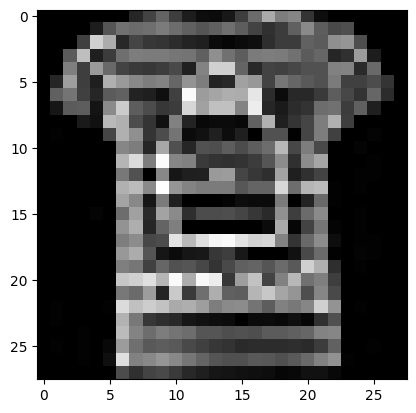

Label: 0
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


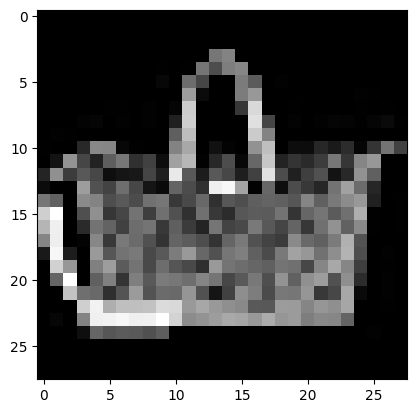

Label: 8
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


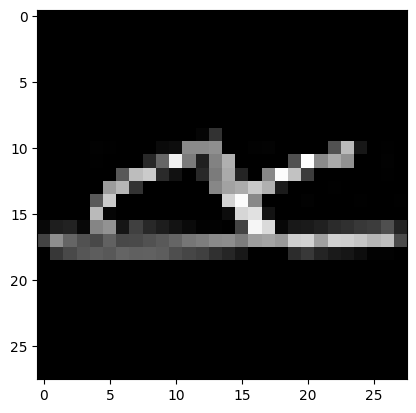

Label: 5
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


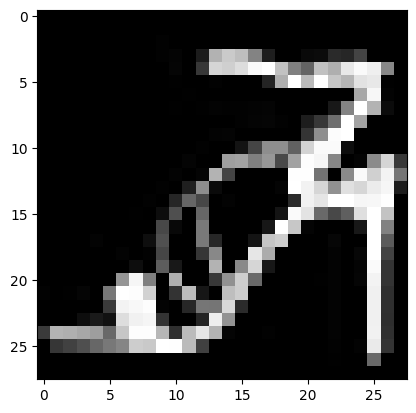

Label: 5
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


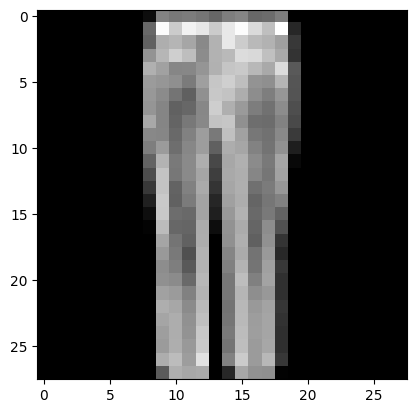

Label: 1
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


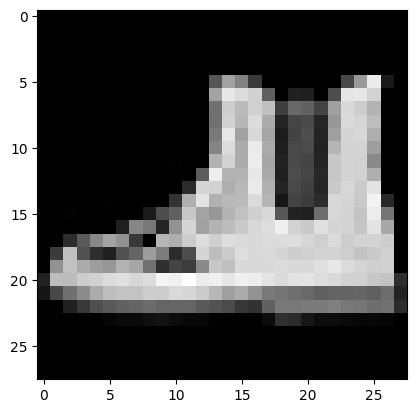

Label: 9
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


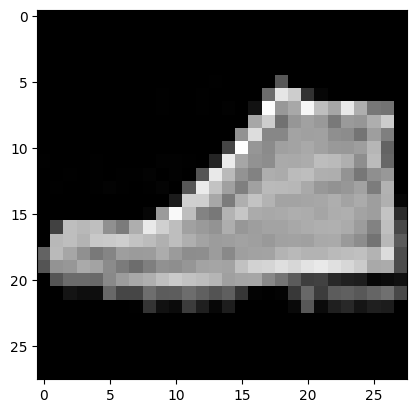

Label: 9
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


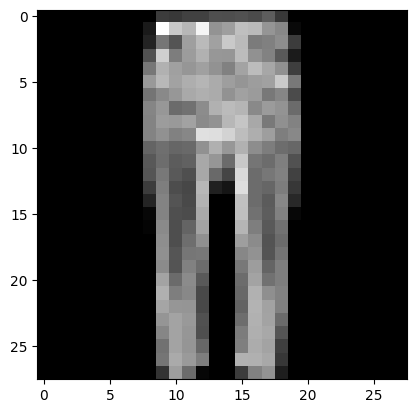

Label: 1
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


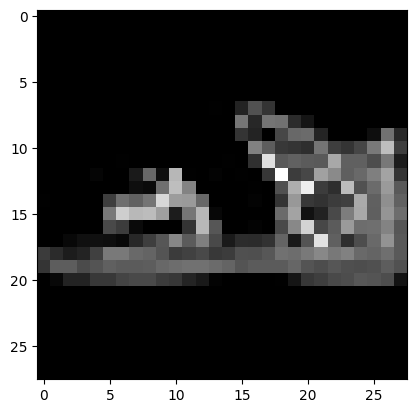

Label: 5
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


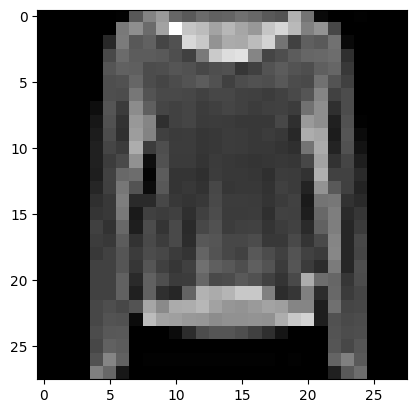

Label: 2
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


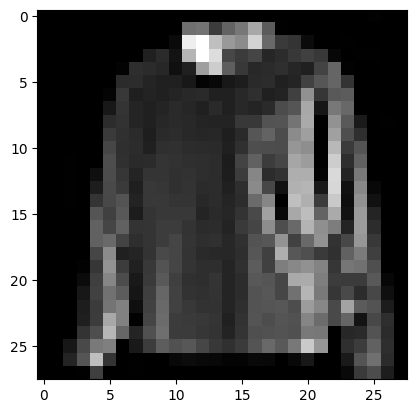

Label: 2
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


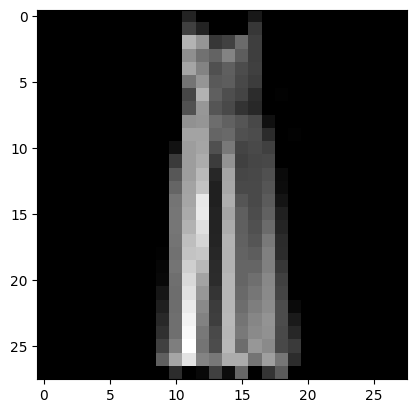

Label: 3
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


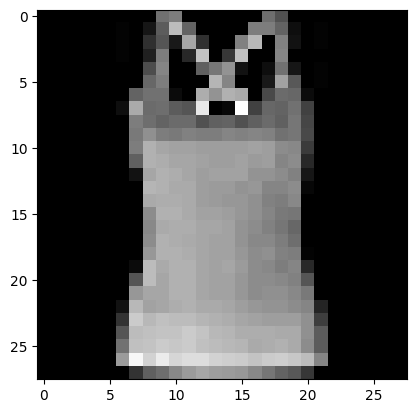

Label: 0
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


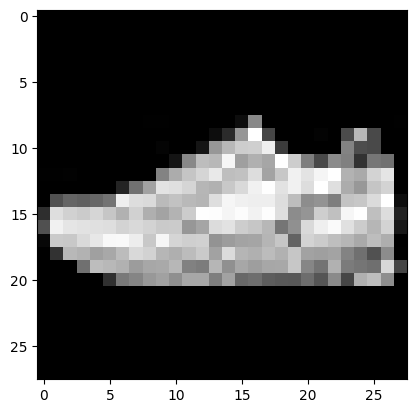

Label: 7
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


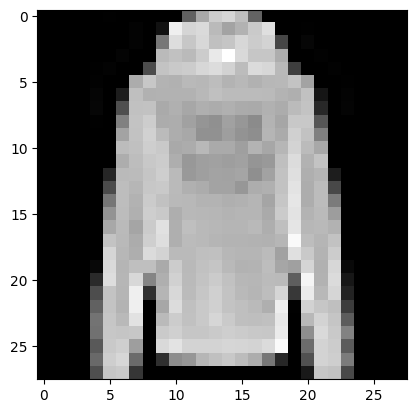

Label: 2
Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


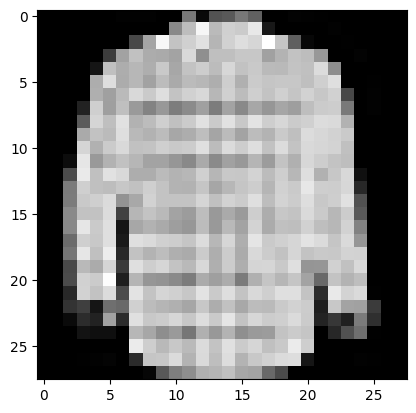

Label: 6


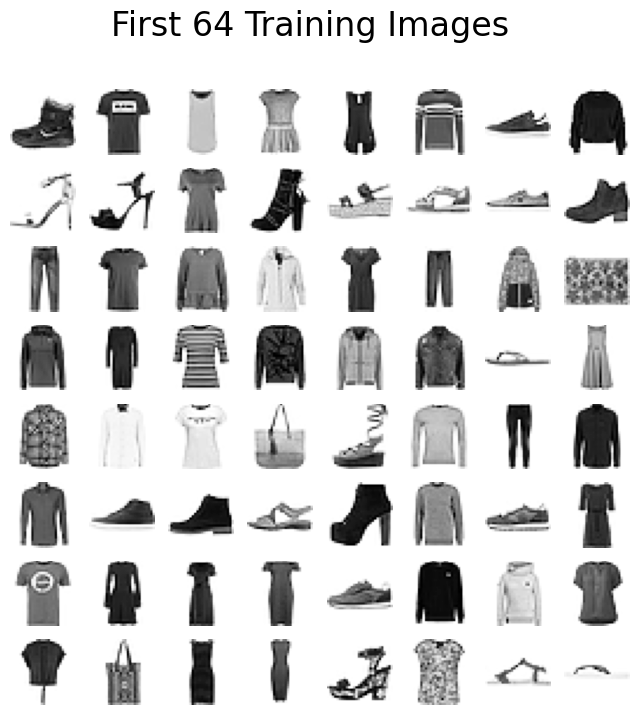

In [3]:
# Use the following code to load and normalize the dataset for training and testing
# It will downlad the dataset into data subfolder (change to your data folder name)
train_dataset = torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)


print(num_train_batches)
print(num_val_batches)
print(num_test_batches)


#Sample code to visulaize the first sample in first 16 batches

batch_num = 0
for train_features, train_labels in train_batches:

     if batch_num == 16:
         break    # break here

     batch_num = batch_num +1
     print(f"Feature batch shape: {train_features.size()}")
     print(f"Labels batch shape: {train_labels.size()}")

     img = train_features[0].squeeze()
     label = train_labels[0]
     plt.imshow(img, cmap="gray")
     plt.show()
     print(f"Label: {label}")



 #Sample code to plot N^2 images from the dataset
def plot_images(XX, N, title):
     fig, ax = plt.subplots(N, N, figsize=(8, 8))

     for i in range(N):
       for j in range(N):
         ax[i,j].imshow(XX[(N)*i+j], cmap="Greys")
         ax[i,j].axis("off")
     fig.suptitle(title, fontsize=24)

plot_images(train_dataset.data[:64], 8, "First 64 Training Images" )



SGD optimizer and default initialization, 0.05 learning rate

  2%|▏         | 1/50 [00:21<17:38, 21.61s/it]

Epoch: 1/50, Train Loss: 0.6097, Validation Loss: 0.6905, Test Loss: 0.6941, Validation Accuracy: 75.13%, Test Accuracy: 75.26%


  4%|▍         | 2/50 [00:42<17:10, 21.48s/it]

Epoch: 2/50, Train Loss: 0.6031, Validation Loss: 0.5590, Test Loss: 0.5758, Validation Accuracy: 79.86%, Test Accuracy: 79.52%


  6%|▌         | 3/50 [01:04<16:45, 21.40s/it]

Epoch: 3/50, Train Loss: 0.4740, Validation Loss: 0.4888, Test Loss: 0.5063, Validation Accuracy: 82.78%, Test Accuracy: 81.77%


  8%|▊         | 4/50 [01:24<16:06, 21.01s/it]

Epoch: 4/50, Train Loss: 0.4399, Validation Loss: 0.4715, Test Loss: 0.4893, Validation Accuracy: 82.84%, Test Accuracy: 82.52%


 10%|█         | 5/50 [01:46<16:03, 21.40s/it]

Epoch: 5/50, Train Loss: 0.4510, Validation Loss: 0.4572, Test Loss: 0.4790, Validation Accuracy: 83.02%, Test Accuracy: 82.25%


 12%|█▏        | 6/50 [02:07<15:32, 21.20s/it]

Epoch: 6/50, Train Loss: 0.3679, Validation Loss: 0.4276, Test Loss: 0.4495, Validation Accuracy: 84.69%, Test Accuracy: 83.84%


 14%|█▍        | 7/50 [02:28<15:09, 21.15s/it]

Epoch: 7/50, Train Loss: 0.4289, Validation Loss: 0.4577, Test Loss: 0.4776, Validation Accuracy: 83.45%, Test Accuracy: 82.29%


 16%|█▌        | 8/50 [02:52<15:17, 21.85s/it]

Epoch: 8/50, Train Loss: 0.3162, Validation Loss: 0.4042, Test Loss: 0.4295, Validation Accuracy: 85.10%, Test Accuracy: 84.67%


 18%|█▊        | 9/50 [03:14<15:03, 22.04s/it]

Epoch: 9/50, Train Loss: 0.2871, Validation Loss: 0.3980, Test Loss: 0.4255, Validation Accuracy: 85.69%, Test Accuracy: 84.95%


 20%|██        | 10/50 [03:36<14:37, 21.93s/it]

Epoch: 10/50, Train Loss: 0.3043, Validation Loss: 0.3961, Test Loss: 0.4166, Validation Accuracy: 85.58%, Test Accuracy: 84.96%


 22%|██▏       | 11/50 [03:58<14:15, 21.92s/it]

Epoch: 11/50, Train Loss: 0.3594, Validation Loss: 0.3745, Test Loss: 0.3989, Validation Accuracy: 86.95%, Test Accuracy: 85.65%


 24%|██▍       | 12/50 [04:18<13:37, 21.53s/it]

Epoch: 12/50, Train Loss: 0.3210, Validation Loss: 0.3766, Test Loss: 0.4060, Validation Accuracy: 86.56%, Test Accuracy: 85.37%


 26%|██▌       | 13/50 [04:40<13:17, 21.56s/it]

Epoch: 13/50, Train Loss: 0.3187, Validation Loss: 0.3673, Test Loss: 0.3914, Validation Accuracy: 86.81%, Test Accuracy: 85.66%


 28%|██▊       | 14/50 [05:01<12:53, 21.49s/it]

Epoch: 14/50, Train Loss: 0.3362, Validation Loss: 0.3667, Test Loss: 0.3984, Validation Accuracy: 86.63%, Test Accuracy: 85.80%


 30%|███       | 15/50 [05:22<12:29, 21.42s/it]

Epoch: 15/50, Train Loss: 0.3077, Validation Loss: 0.3687, Test Loss: 0.3962, Validation Accuracy: 86.80%, Test Accuracy: 85.38%


 32%|███▏      | 16/50 [05:44<12:12, 21.53s/it]

Epoch: 16/50, Train Loss: 0.2972, Validation Loss: 0.3554, Test Loss: 0.3764, Validation Accuracy: 87.13%, Test Accuracy: 86.35%


 34%|███▍      | 17/50 [06:06<11:51, 21.55s/it]

Epoch: 17/50, Train Loss: 0.3281, Validation Loss: 0.3719, Test Loss: 0.3952, Validation Accuracy: 86.20%, Test Accuracy: 85.25%


 36%|███▌      | 18/50 [06:27<11:23, 21.35s/it]

Epoch: 18/50, Train Loss: 0.3438, Validation Loss: 0.3510, Test Loss: 0.3683, Validation Accuracy: 87.28%, Test Accuracy: 86.70%


 38%|███▊      | 19/50 [06:49<11:07, 21.55s/it]

Epoch: 19/50, Train Loss: 0.3188, Validation Loss: 0.3439, Test Loss: 0.3663, Validation Accuracy: 87.56%, Test Accuracy: 86.87%


 40%|████      | 20/50 [07:10<10:41, 21.40s/it]

Epoch: 20/50, Train Loss: 0.3499, Validation Loss: 0.3552, Test Loss: 0.3825, Validation Accuracy: 87.23%, Test Accuracy: 86.07%


 42%|████▏     | 21/50 [07:31<10:23, 21.49s/it]

Epoch: 21/50, Train Loss: 0.3631, Validation Loss: 0.3531, Test Loss: 0.3826, Validation Accuracy: 87.01%, Test Accuracy: 85.98%


 44%|████▍     | 22/50 [07:53<10:05, 21.63s/it]

Epoch: 22/50, Train Loss: 0.2632, Validation Loss: 0.3298, Test Loss: 0.3491, Validation Accuracy: 88.30%, Test Accuracy: 87.20%


 46%|████▌     | 23/50 [08:14<09:37, 21.39s/it]

Epoch: 23/50, Train Loss: 0.3321, Validation Loss: 0.3418, Test Loss: 0.3684, Validation Accuracy: 87.70%, Test Accuracy: 86.82%


 48%|████▊     | 24/50 [08:36<09:18, 21.47s/it]

Epoch: 24/50, Train Loss: 0.2743, Validation Loss: 0.3243, Test Loss: 0.3438, Validation Accuracy: 88.37%, Test Accuracy: 87.92%


 50%|█████     | 25/50 [08:58<09:00, 21.61s/it]

Epoch: 25/50, Train Loss: 0.2767, Validation Loss: 0.3574, Test Loss: 0.3709, Validation Accuracy: 86.88%, Test Accuracy: 86.32%


 52%|█████▏    | 26/50 [09:19<08:32, 21.34s/it]

Epoch: 26/50, Train Loss: 0.2352, Validation Loss: 0.3191, Test Loss: 0.3398, Validation Accuracy: 88.67%, Test Accuracy: 87.72%


 54%|█████▍    | 27/50 [09:44<08:36, 22.45s/it]

Epoch: 27/50, Train Loss: 0.2469, Validation Loss: 0.3229, Test Loss: 0.3409, Validation Accuracy: 88.48%, Test Accuracy: 87.74%


 56%|█████▌    | 28/50 [10:05<08:09, 22.23s/it]

Epoch: 28/50, Train Loss: 0.2368, Validation Loss: 0.3184, Test Loss: 0.3541, Validation Accuracy: 88.36%, Test Accuracy: 87.33%


 58%|█████▊    | 29/50 [10:26<07:39, 21.86s/it]

Epoch: 29/50, Train Loss: 0.3796, Validation Loss: 0.3455, Test Loss: 0.3743, Validation Accuracy: 87.02%, Test Accuracy: 86.50%


 60%|██████    | 30/50 [10:48<07:16, 21.85s/it]

Epoch: 30/50, Train Loss: 0.2200, Validation Loss: 0.3457, Test Loss: 0.3742, Validation Accuracy: 86.72%, Test Accuracy: 86.46%


 62%|██████▏   | 31/50 [11:10<06:54, 21.84s/it]

Epoch: 31/50, Train Loss: 0.3321, Validation Loss: 0.3311, Test Loss: 0.3592, Validation Accuracy: 87.41%, Test Accuracy: 87.28%


 64%|██████▍   | 32/50 [11:31<06:27, 21.51s/it]

Epoch: 32/50, Train Loss: 0.2884, Validation Loss: 0.3155, Test Loss: 0.3391, Validation Accuracy: 88.36%, Test Accuracy: 87.76%


 66%|██████▌   | 33/50 [11:52<06:07, 21.59s/it]

Epoch: 33/50, Train Loss: 0.2722, Validation Loss: 0.3609, Test Loss: 0.3829, Validation Accuracy: 86.55%, Test Accuracy: 86.03%


 68%|██████▊   | 34/50 [12:14<05:46, 21.67s/it]

Epoch: 34/50, Train Loss: 0.2591, Validation Loss: 0.3322, Test Loss: 0.3578, Validation Accuracy: 87.42%, Test Accuracy: 86.83%


 70%|███████   | 35/50 [12:35<05:21, 21.41s/it]

Epoch: 35/50, Train Loss: 0.2391, Validation Loss: 0.3166, Test Loss: 0.3455, Validation Accuracy: 88.61%, Test Accuracy: 87.48%


 72%|███████▏  | 36/50 [12:57<05:02, 21.63s/it]

Epoch: 36/50, Train Loss: 0.1945, Validation Loss: 0.3129, Test Loss: 0.3473, Validation Accuracy: 88.59%, Test Accuracy: 87.44%


 74%|███████▍  | 37/50 [13:19<04:42, 21.70s/it]

Epoch: 37/50, Train Loss: 0.2592, Validation Loss: 0.3236, Test Loss: 0.3423, Validation Accuracy: 88.08%, Test Accuracy: 87.51%


 76%|███████▌  | 38/50 [13:40<04:16, 21.40s/it]

Epoch: 38/50, Train Loss: 0.2427, Validation Loss: 0.3116, Test Loss: 0.3372, Validation Accuracy: 88.55%, Test Accuracy: 88.12%


 78%|███████▊  | 39/50 [14:01<03:56, 21.46s/it]

Epoch: 39/50, Train Loss: 0.2029, Validation Loss: 0.2994, Test Loss: 0.3340, Validation Accuracy: 89.04%, Test Accuracy: 87.90%


 80%|████████  | 40/50 [14:23<03:34, 21.49s/it]

Epoch: 40/50, Train Loss: 0.1924, Validation Loss: 0.2976, Test Loss: 0.3270, Validation Accuracy: 89.13%, Test Accuracy: 88.47%


 82%|████████▏ | 41/50 [14:44<03:12, 21.42s/it]

Epoch: 41/50, Train Loss: 0.2374, Validation Loss: 0.3123, Test Loss: 0.3574, Validation Accuracy: 88.63%, Test Accuracy: 87.41%


 84%|████████▍ | 42/50 [15:06<02:52, 21.52s/it]

Epoch: 42/50, Train Loss: 0.1903, Validation Loss: 0.3071, Test Loss: 0.3295, Validation Accuracy: 89.08%, Test Accuracy: 88.06%


 86%|████████▌ | 43/50 [15:27<02:29, 21.37s/it]

Epoch: 43/50, Train Loss: 0.2783, Validation Loss: 0.3099, Test Loss: 0.3342, Validation Accuracy: 88.21%, Test Accuracy: 88.05%


 88%|████████▊ | 44/50 [15:49<02:08, 21.43s/it]

Epoch: 44/50, Train Loss: 0.2036, Validation Loss: 0.3102, Test Loss: 0.3483, Validation Accuracy: 88.34%, Test Accuracy: 87.62%


 90%|█████████ | 45/50 [16:10<01:47, 21.56s/it]

Epoch: 45/50, Train Loss: 0.2450, Validation Loss: 0.2995, Test Loss: 0.3303, Validation Accuracy: 88.87%, Test Accuracy: 87.98%


 92%|█████████▏| 46/50 [16:31<01:25, 21.39s/it]

Epoch: 46/50, Train Loss: 0.2038, Validation Loss: 0.3051, Test Loss: 0.3272, Validation Accuracy: 88.98%, Test Accuracy: 88.33%


 94%|█████████▍| 47/50 [16:54<01:04, 21.60s/it]

Epoch: 47/50, Train Loss: 0.2272, Validation Loss: 0.2997, Test Loss: 0.3279, Validation Accuracy: 89.45%, Test Accuracy: 88.28%


 96%|█████████▌| 48/50 [17:15<00:43, 21.71s/it]

Epoch: 48/50, Train Loss: 0.2006, Validation Loss: 0.2976, Test Loss: 0.3211, Validation Accuracy: 88.87%, Test Accuracy: 88.41%


 98%|█████████▊| 49/50 [17:36<00:21, 21.39s/it]

Epoch: 49/50, Train Loss: 0.1761, Validation Loss: 0.2991, Test Loss: 0.3237, Validation Accuracy: 89.03%, Test Accuracy: 88.24%


100%|██████████| 50/50 [17:58<00:00, 21.57s/it]

Epoch: 50/50, Train Loss: 0.1612, Validation Loss: 0.2886, Test Loss: 0.3192, Validation Accuracy: 89.35%, Test Accuracy: 88.61%


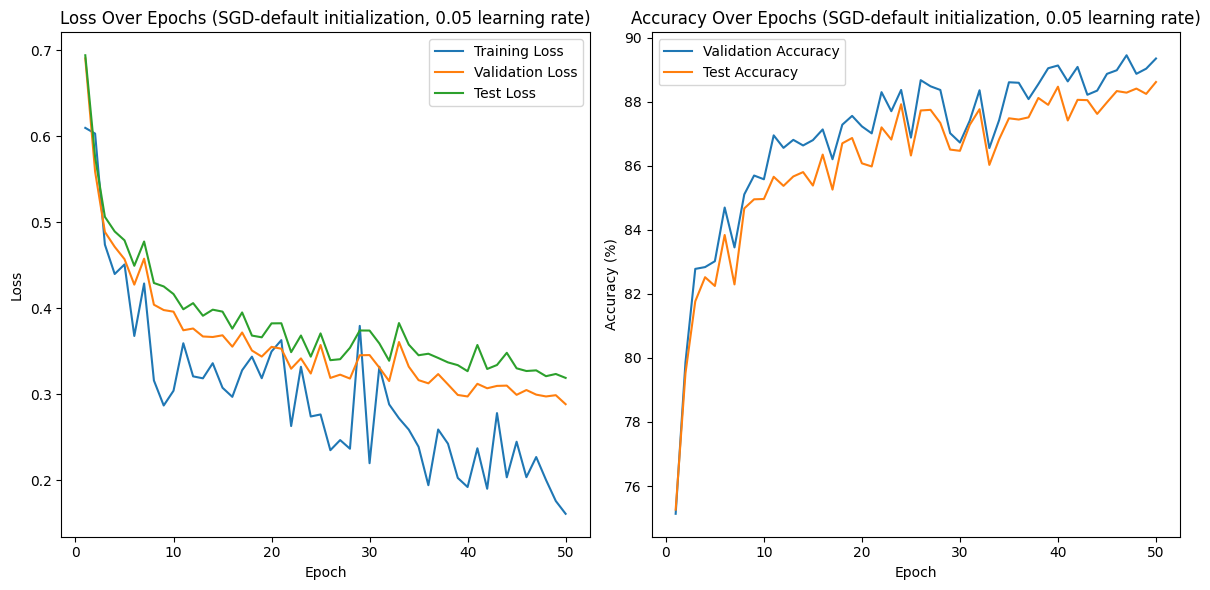

Train Loss Std: 0.0956
Validation Loss Std: 0.0731
Test Loss Std: 0.0693
Validation Accuracy Std: 0.0259
Test Accuracy Std: 0.0250


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.05
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD-default initialization, 0.05 learning rate)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD-default initialization, 0.05 learning rate)')
plt.legend()
plt.tight_layout()
plt.show()


# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")






SGD optimizer and default initialization, which is often based on a uniform or normal distribution with different learning rate (0.02)

  2%|▏         | 1/50 [00:22<18:05, 22.15s/it]

Epoch: 1/50, Train Loss: 0.8968, Validation Loss: 0.9039, Test Loss: 0.9115, Validation Accuracy: 69.00%, Test Accuracy: 67.22%


  4%|▍         | 2/50 [00:42<16:59, 21.23s/it]

Epoch: 2/50, Train Loss: 0.6586, Validation Loss: 0.7195, Test Loss: 0.7267, Validation Accuracy: 73.90%, Test Accuracy: 73.69%


  6%|▌         | 3/50 [01:04<16:51, 21.51s/it]

Epoch: 3/50, Train Loss: 0.6181, Validation Loss: 0.6110, Test Loss: 0.6260, Validation Accuracy: 78.87%, Test Accuracy: 77.95%


  8%|▊         | 4/50 [01:26<16:37, 21.67s/it]

Epoch: 4/50, Train Loss: 0.5750, Validation Loss: 0.5642, Test Loss: 0.5701, Validation Accuracy: 80.17%, Test Accuracy: 79.63%


 10%|█         | 5/50 [01:47<16:00, 21.34s/it]

Epoch: 5/50, Train Loss: 0.4978, Validation Loss: 0.5313, Test Loss: 0.5447, Validation Accuracy: 81.42%, Test Accuracy: 80.49%


 12%|█▏        | 6/50 [02:09<15:45, 21.50s/it]

Epoch: 6/50, Train Loss: 0.4253, Validation Loss: 0.5140, Test Loss: 0.5351, Validation Accuracy: 82.18%, Test Accuracy: 80.60%


 14%|█▍        | 7/50 [02:30<15:30, 21.63s/it]

Epoch: 7/50, Train Loss: 0.3682, Validation Loss: 0.4928, Test Loss: 0.5118, Validation Accuracy: 82.40%, Test Accuracy: 81.32%


 16%|█▌        | 8/50 [02:51<14:55, 21.32s/it]

Epoch: 8/50, Train Loss: 0.5157, Validation Loss: 0.4795, Test Loss: 0.5037, Validation Accuracy: 83.09%, Test Accuracy: 82.44%


 18%|█▊        | 9/50 [03:13<14:40, 21.47s/it]

Epoch: 9/50, Train Loss: 0.5263, Validation Loss: 0.4788, Test Loss: 0.5049, Validation Accuracy: 82.76%, Test Accuracy: 81.67%


 20%|██        | 10/50 [03:35<14:23, 21.60s/it]

Epoch: 10/50, Train Loss: 0.3892, Validation Loss: 0.4632, Test Loss: 0.4793, Validation Accuracy: 83.32%, Test Accuracy: 82.88%


 22%|██▏       | 11/50 [03:56<13:57, 21.47s/it]

Epoch: 11/50, Train Loss: 0.4508, Validation Loss: 0.4444, Test Loss: 0.4604, Validation Accuracy: 84.20%, Test Accuracy: 83.49%


 24%|██▍       | 12/50 [04:18<13:40, 21.60s/it]

Epoch: 12/50, Train Loss: 0.4323, Validation Loss: 0.4624, Test Loss: 0.4836, Validation Accuracy: 82.90%, Test Accuracy: 82.77%


 26%|██▌       | 13/50 [04:39<13:14, 21.47s/it]

Epoch: 13/50, Train Loss: 0.4450, Validation Loss: 0.4404, Test Loss: 0.4590, Validation Accuracy: 84.26%, Test Accuracy: 83.58%


 28%|██▊       | 14/50 [05:01<12:54, 21.52s/it]

Epoch: 14/50, Train Loss: 0.3473, Validation Loss: 0.4228, Test Loss: 0.4474, Validation Accuracy: 85.00%, Test Accuracy: 84.02%


 30%|███       | 15/50 [05:23<12:37, 21.65s/it]

Epoch: 15/50, Train Loss: 0.3370, Validation Loss: 0.4216, Test Loss: 0.4473, Validation Accuracy: 85.00%, Test Accuracy: 84.05%


 32%|███▏      | 16/50 [05:44<12:11, 21.52s/it]

Epoch: 16/50, Train Loss: 0.4608, Validation Loss: 0.4236, Test Loss: 0.4498, Validation Accuracy: 85.03%, Test Accuracy: 83.75%


 34%|███▍      | 17/50 [06:06<11:51, 21.56s/it]

Epoch: 17/50, Train Loss: 0.2864, Validation Loss: 0.4122, Test Loss: 0.4296, Validation Accuracy: 85.14%, Test Accuracy: 84.58%


 36%|███▌      | 18/50 [06:27<11:33, 21.67s/it]

Epoch: 18/50, Train Loss: 0.3244, Validation Loss: 0.4186, Test Loss: 0.4405, Validation Accuracy: 84.54%, Test Accuracy: 84.30%


 38%|███▊      | 19/50 [06:48<11:05, 21.45s/it]

Epoch: 19/50, Train Loss: 0.3906, Validation Loss: 0.3986, Test Loss: 0.4213, Validation Accuracy: 85.61%, Test Accuracy: 85.04%


 40%|████      | 20/50 [07:10<10:47, 21.59s/it]

Epoch: 20/50, Train Loss: 0.3150, Validation Loss: 0.4101, Test Loss: 0.4379, Validation Accuracy: 85.03%, Test Accuracy: 84.57%


 42%|████▏     | 21/50 [07:32<10:30, 21.75s/it]

Epoch: 21/50, Train Loss: 0.4043, Validation Loss: 0.3937, Test Loss: 0.4119, Validation Accuracy: 85.98%, Test Accuracy: 85.25%


 44%|████▍     | 22/50 [07:53<10:02, 21.53s/it]

Epoch: 22/50, Train Loss: 0.3248, Validation Loss: 0.3910, Test Loss: 0.4146, Validation Accuracy: 85.93%, Test Accuracy: 85.08%


 46%|████▌     | 23/50 [08:15<09:43, 21.62s/it]

Epoch: 23/50, Train Loss: 0.2884, Validation Loss: 0.3962, Test Loss: 0.4180, Validation Accuracy: 85.44%, Test Accuracy: 84.97%


 48%|████▊     | 24/50 [08:37<09:24, 21.72s/it]

Epoch: 24/50, Train Loss: 0.2475, Validation Loss: 0.3880, Test Loss: 0.4129, Validation Accuracy: 85.85%, Test Accuracy: 85.21%


 50%|█████     | 25/50 [08:58<08:57, 21.49s/it]

Epoch: 25/50, Train Loss: 0.3692, Validation Loss: 0.3850, Test Loss: 0.4148, Validation Accuracy: 85.94%, Test Accuracy: 85.30%


 52%|█████▏    | 26/50 [09:20<08:38, 21.60s/it]

Epoch: 26/50, Train Loss: 0.3162, Validation Loss: 0.3835, Test Loss: 0.4135, Validation Accuracy: 86.31%, Test Accuracy: 85.53%


 54%|█████▍    | 27/50 [09:42<08:19, 21.70s/it]

Epoch: 27/50, Train Loss: 0.3773, Validation Loss: 0.3994, Test Loss: 0.4256, Validation Accuracy: 85.26%, Test Accuracy: 84.72%


 56%|█████▌    | 28/50 [10:03<07:51, 21.42s/it]

Epoch: 28/50, Train Loss: 0.3127, Validation Loss: 0.3908, Test Loss: 0.4146, Validation Accuracy: 85.63%, Test Accuracy: 85.11%


 58%|█████▊    | 29/50 [10:25<07:36, 21.72s/it]

Epoch: 29/50, Train Loss: 0.3537, Validation Loss: 0.3697, Test Loss: 0.3899, Validation Accuracy: 86.78%, Test Accuracy: 85.95%


 60%|██████    | 30/50 [10:47<07:15, 21.80s/it]

Epoch: 30/50, Train Loss: 0.2936, Validation Loss: 0.3732, Test Loss: 0.3988, Validation Accuracy: 86.55%, Test Accuracy: 85.83%


 62%|██████▏   | 31/50 [11:08<06:48, 21.52s/it]

Epoch: 31/50, Train Loss: 0.3717, Validation Loss: 0.3764, Test Loss: 0.4044, Validation Accuracy: 86.11%, Test Accuracy: 85.42%


 64%|██████▍   | 32/50 [11:30<06:28, 21.59s/it]

Epoch: 32/50, Train Loss: 0.3514, Validation Loss: 0.3882, Test Loss: 0.4069, Validation Accuracy: 85.97%, Test Accuracy: 85.07%


 66%|██████▌   | 33/50 [11:51<06:04, 21.43s/it]

Epoch: 33/50, Train Loss: 0.3588, Validation Loss: 0.3828, Test Loss: 0.4036, Validation Accuracy: 85.88%, Test Accuracy: 85.47%


 68%|██████▊   | 34/50 [12:12<05:42, 21.39s/it]

Epoch: 34/50, Train Loss: 0.2727, Validation Loss: 0.3644, Test Loss: 0.3812, Validation Accuracy: 87.03%, Test Accuracy: 86.52%


 70%|███████   | 35/50 [12:34<05:22, 21.51s/it]

Epoch: 35/50, Train Loss: 0.3571, Validation Loss: 0.3632, Test Loss: 0.3775, Validation Accuracy: 87.45%, Test Accuracy: 86.44%


 72%|███████▏  | 36/50 [12:55<04:59, 21.36s/it]

Epoch: 36/50, Train Loss: 0.3615, Validation Loss: 0.3915, Test Loss: 0.4056, Validation Accuracy: 86.23%, Test Accuracy: 85.10%


 74%|███████▍  | 37/50 [13:17<04:39, 21.53s/it]

Epoch: 37/50, Train Loss: 0.3626, Validation Loss: 0.3599, Test Loss: 0.3809, Validation Accuracy: 87.26%, Test Accuracy: 86.28%


 76%|███████▌  | 38/50 [13:38<04:18, 21.55s/it]

Epoch: 38/50, Train Loss: 0.3145, Validation Loss: 0.3547, Test Loss: 0.3779, Validation Accuracy: 87.58%, Test Accuracy: 86.28%


 78%|███████▊  | 39/50 [13:59<03:54, 21.29s/it]

Epoch: 39/50, Train Loss: 0.4347, Validation Loss: 0.3558, Test Loss: 0.3792, Validation Accuracy: 87.24%, Test Accuracy: 86.33%


 80%|████████  | 40/50 [14:21<03:34, 21.47s/it]

Epoch: 40/50, Train Loss: 0.3448, Validation Loss: 0.3653, Test Loss: 0.3946, Validation Accuracy: 86.90%, Test Accuracy: 85.88%


 82%|████████▏ | 41/50 [14:43<03:14, 21.57s/it]

Epoch: 41/50, Train Loss: 0.3279, Validation Loss: 0.3721, Test Loss: 0.3922, Validation Accuracy: 86.75%, Test Accuracy: 86.01%


 84%|████████▍ | 42/50 [15:04<02:50, 21.32s/it]

Epoch: 42/50, Train Loss: 0.2576, Validation Loss: 0.3552, Test Loss: 0.3802, Validation Accuracy: 87.17%, Test Accuracy: 86.32%


 86%|████████▌ | 43/50 [15:26<02:31, 21.62s/it]

Epoch: 43/50, Train Loss: 0.2617, Validation Loss: 0.3625, Test Loss: 0.3863, Validation Accuracy: 86.59%, Test Accuracy: 86.21%


 88%|████████▊ | 44/50 [15:48<02:09, 21.64s/it]

Epoch: 44/50, Train Loss: 0.3009, Validation Loss: 0.3455, Test Loss: 0.3754, Validation Accuracy: 87.64%, Test Accuracy: 86.71%


 90%|█████████ | 45/50 [16:09<01:47, 21.45s/it]

Epoch: 45/50, Train Loss: 0.3386, Validation Loss: 0.3502, Test Loss: 0.3711, Validation Accuracy: 87.58%, Test Accuracy: 86.58%


 92%|█████████▏| 46/50 [16:30<01:26, 21.57s/it]

Epoch: 46/50, Train Loss: 0.3075, Validation Loss: 0.3399, Test Loss: 0.3643, Validation Accuracy: 87.87%, Test Accuracy: 87.03%


 94%|█████████▍| 47/50 [16:52<01:04, 21.53s/it]

Epoch: 47/50, Train Loss: 0.2717, Validation Loss: 0.3519, Test Loss: 0.3867, Validation Accuracy: 86.90%, Test Accuracy: 86.37%


 96%|█████████▌| 48/50 [17:13<00:43, 21.52s/it]

Epoch: 48/50, Train Loss: 0.2997, Validation Loss: 0.3509, Test Loss: 0.3717, Validation Accuracy: 87.32%, Test Accuracy: 86.46%


 98%|█████████▊| 49/50 [17:35<00:21, 21.61s/it]

Epoch: 49/50, Train Loss: 0.3436, Validation Loss: 0.3373, Test Loss: 0.3633, Validation Accuracy: 88.26%, Test Accuracy: 86.74%


100%|██████████| 50/50 [17:57<00:00, 21.54s/it]

Epoch: 50/50, Train Loss: 0.2777, Validation Loss: 0.3384, Test Loss: 0.3717, Validation Accuracy: 87.95%, Test Accuracy: 86.88%


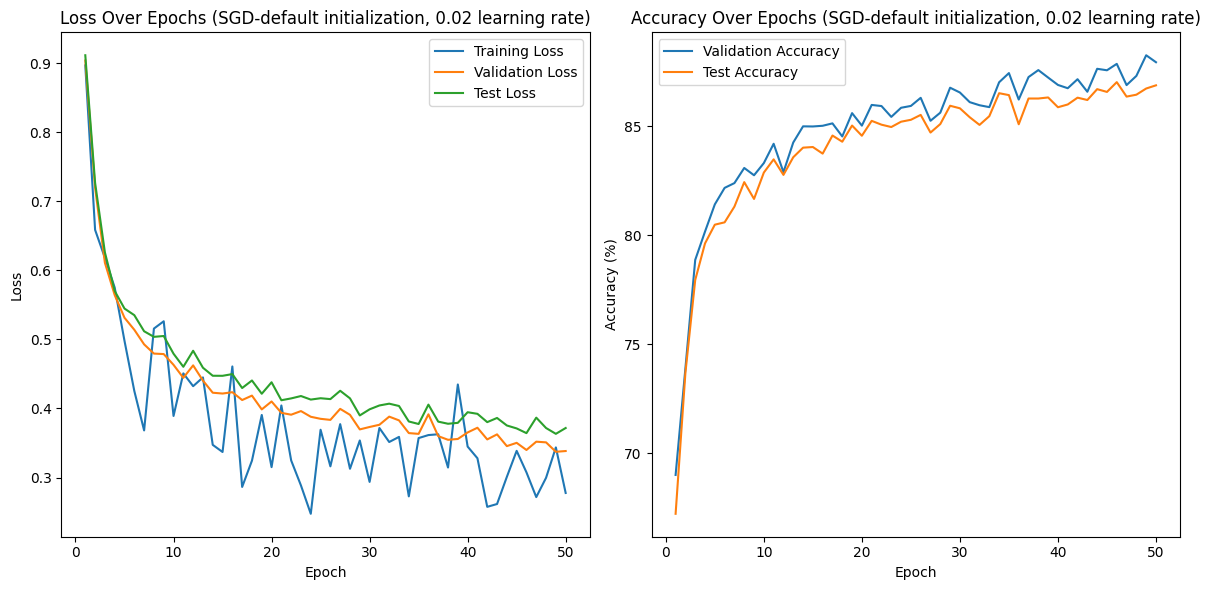

Train Loss Std: 0.1163
Validation Loss Std: 0.1007
Test Loss Std: 0.0969
Validation Accuracy Std: 0.0344
Test Accuracy Std: 0.0349


In [ ]:

#SGD-default initialization, which is often based on a uniform or normal distribution with different learning rate (0.02)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.02
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD-default initialization, 0.02 learning rate)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD-default initialization, 0.02 learning rate)')
plt.legend()
plt.tight_layout()
plt.show()


# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")








RMS prop optimizer and default initialization

  2%|▏         | 1/50 [00:21<17:33, 21.50s/it]

Epoch: 1/50, Train Loss: 0.5621, Validation Loss: 0.5897, Test Loss: 0.5979, Validation Accuracy: 79.09%, Test Accuracy: 78.48%


  4%|▍         | 2/50 [00:43<17:30, 21.89s/it]

Epoch: 2/50, Train Loss: 0.5770, Validation Loss: 0.4871, Test Loss: 0.5068, Validation Accuracy: 83.16%, Test Accuracy: 82.19%


  6%|▌         | 3/50 [01:04<16:55, 21.60s/it]

Epoch: 3/50, Train Loss: 0.4311, Validation Loss: 0.4660, Test Loss: 0.4961, Validation Accuracy: 83.26%, Test Accuracy: 81.87%


  8%|▊         | 4/50 [01:26<16:34, 21.63s/it]

Epoch: 4/50, Train Loss: 0.4904, Validation Loss: 0.4484, Test Loss: 0.4692, Validation Accuracy: 83.36%, Test Accuracy: 83.03%


 10%|█         | 5/50 [01:48<16:19, 21.76s/it]

Epoch: 5/50, Train Loss: 0.4011, Validation Loss: 0.4391, Test Loss: 0.4563, Validation Accuracy: 83.95%, Test Accuracy: 83.05%


 12%|█▏        | 6/50 [02:09<15:45, 21.49s/it]

Epoch: 6/50, Train Loss: 0.2860, Validation Loss: 0.3981, Test Loss: 0.4181, Validation Accuracy: 85.43%, Test Accuracy: 85.11%


 14%|█▍        | 7/50 [02:31<15:31, 21.66s/it]

Epoch: 7/50, Train Loss: 0.3823, Validation Loss: 0.4163, Test Loss: 0.4303, Validation Accuracy: 84.52%, Test Accuracy: 84.37%


 16%|█▌        | 8/50 [02:53<15:11, 21.71s/it]

Epoch: 8/50, Train Loss: 0.3427, Validation Loss: 0.4001, Test Loss: 0.4235, Validation Accuracy: 85.37%, Test Accuracy: 84.40%


 18%|█▊        | 9/50 [03:14<14:37, 21.40s/it]

Epoch: 9/50, Train Loss: 0.4408, Validation Loss: 0.3765, Test Loss: 0.3981, Validation Accuracy: 86.27%, Test Accuracy: 85.66%


 20%|██        | 10/50 [03:35<14:20, 21.51s/it]

Epoch: 10/50, Train Loss: 0.2779, Validation Loss: 0.3739, Test Loss: 0.3940, Validation Accuracy: 86.51%, Test Accuracy: 85.69%


 22%|██▏       | 11/50 [03:57<14:02, 21.60s/it]

Epoch: 11/50, Train Loss: 0.3081, Validation Loss: 0.3690, Test Loss: 0.3880, Validation Accuracy: 86.29%, Test Accuracy: 85.84%


 24%|██▍       | 12/50 [04:18<13:30, 21.32s/it]

Epoch: 12/50, Train Loss: 0.3972, Validation Loss: 0.3617, Test Loss: 0.3792, Validation Accuracy: 86.67%, Test Accuracy: 86.23%


 26%|██▌       | 13/50 [04:39<13:12, 21.42s/it]

Epoch: 13/50, Train Loss: 0.2727, Validation Loss: 0.3596, Test Loss: 0.3815, Validation Accuracy: 86.86%, Test Accuracy: 86.08%


 28%|██▊       | 14/50 [05:02<12:58, 21.63s/it]

Epoch: 14/50, Train Loss: 0.3162, Validation Loss: 0.3672, Test Loss: 0.3955, Validation Accuracy: 86.40%, Test Accuracy: 85.66%


 30%|███       | 15/50 [05:23<12:31, 21.46s/it]

Epoch: 15/50, Train Loss: 0.3341, Validation Loss: 0.3500, Test Loss: 0.3739, Validation Accuracy: 86.99%, Test Accuracy: 86.46%


 32%|███▏      | 16/50 [05:45<12:13, 21.58s/it]

Epoch: 16/50, Train Loss: 0.3543, Validation Loss: 0.3418, Test Loss: 0.3688, Validation Accuracy: 87.99%, Test Accuracy: 86.70%


 34%|███▍      | 17/50 [06:07<11:57, 21.74s/it]

Epoch: 17/50, Train Loss: 0.2717, Validation Loss: 0.3323, Test Loss: 0.3572, Validation Accuracy: 88.02%, Test Accuracy: 87.10%


 36%|███▌      | 18/50 [06:28<11:27, 21.50s/it]

Epoch: 18/50, Train Loss: 0.3547, Validation Loss: 0.3364, Test Loss: 0.3533, Validation Accuracy: 87.66%, Test Accuracy: 87.30%


 38%|███▊      | 19/50 [06:50<11:11, 21.66s/it]

Epoch: 19/50, Train Loss: 0.2764, Validation Loss: 0.3366, Test Loss: 0.3599, Validation Accuracy: 87.65%, Test Accuracy: 87.07%


 40%|████      | 20/50 [07:11<10:49, 21.65s/it]

Epoch: 20/50, Train Loss: 0.2522, Validation Loss: 0.3557, Test Loss: 0.3729, Validation Accuracy: 86.83%, Test Accuracy: 86.48%


 42%|████▏     | 21/50 [07:33<10:25, 21.58s/it]

Epoch: 21/50, Train Loss: 0.3285, Validation Loss: 0.3436, Test Loss: 0.3652, Validation Accuracy: 87.24%, Test Accuracy: 86.72%


 44%|████▍     | 22/50 [07:54<10:06, 21.65s/it]

Epoch: 22/50, Train Loss: 0.3065, Validation Loss: 0.3386, Test Loss: 0.3579, Validation Accuracy: 87.49%, Test Accuracy: 86.82%


 46%|████▌     | 23/50 [08:16<09:41, 21.55s/it]

Epoch: 23/50, Train Loss: 0.3502, Validation Loss: 0.3293, Test Loss: 0.3474, Validation Accuracy: 87.96%, Test Accuracy: 87.35%


 48%|████▊     | 24/50 [08:37<09:18, 21.49s/it]

Epoch: 24/50, Train Loss: 0.3102, Validation Loss: 0.3316, Test Loss: 0.3547, Validation Accuracy: 87.88%, Test Accuracy: 87.24%


 50%|█████     | 25/50 [08:59<09:00, 21.61s/it]

Epoch: 25/50, Train Loss: 0.2937, Validation Loss: 0.3260, Test Loss: 0.3557, Validation Accuracy: 88.17%, Test Accuracy: 87.05%


 52%|█████▏    | 26/50 [09:20<08:35, 21.49s/it]

Epoch: 26/50, Train Loss: 0.2811, Validation Loss: 0.3188, Test Loss: 0.3548, Validation Accuracy: 88.16%, Test Accuracy: 87.28%


 54%|█████▍    | 27/50 [09:42<08:15, 21.53s/it]

Epoch: 27/50, Train Loss: 0.2453, Validation Loss: 0.3171, Test Loss: 0.3494, Validation Accuracy: 88.51%, Test Accuracy: 87.34%


 56%|█████▌    | 28/50 [10:04<07:57, 21.68s/it]

Epoch: 28/50, Train Loss: 0.3171, Validation Loss: 0.3218, Test Loss: 0.3493, Validation Accuracy: 87.97%, Test Accuracy: 86.81%


 58%|█████▊    | 29/50 [10:25<07:32, 21.56s/it]

Epoch: 29/50, Train Loss: 0.3051, Validation Loss: 0.3229, Test Loss: 0.3404, Validation Accuracy: 87.91%, Test Accuracy: 87.63%


 60%|██████    | 30/50 [10:47<07:11, 21.56s/it]

Epoch: 30/50, Train Loss: 0.2630, Validation Loss: 0.3284, Test Loss: 0.3543, Validation Accuracy: 87.71%, Test Accuracy: 87.01%


 62%|██████▏   | 31/50 [11:09<06:52, 21.72s/it]

Epoch: 31/50, Train Loss: 0.3186, Validation Loss: 0.3059, Test Loss: 0.3247, Validation Accuracy: 88.54%, Test Accuracy: 88.44%


 64%|██████▍   | 32/50 [11:30<06:27, 21.55s/it]

Epoch: 32/50, Train Loss: 0.3243, Validation Loss: 0.3297, Test Loss: 0.3539, Validation Accuracy: 87.98%, Test Accuracy: 86.93%


 66%|██████▌   | 33/50 [11:52<06:06, 21.59s/it]

Epoch: 33/50, Train Loss: 0.3460, Validation Loss: 0.3363, Test Loss: 0.3618, Validation Accuracy: 87.58%, Test Accuracy: 87.19%


 68%|██████▊   | 34/50 [12:14<05:47, 21.72s/it]

Epoch: 34/50, Train Loss: 0.3182, Validation Loss: 0.3047, Test Loss: 0.3251, Validation Accuracy: 88.80%, Test Accuracy: 88.29%


 70%|███████   | 35/50 [12:35<05:23, 21.57s/it]

Epoch: 35/50, Train Loss: 0.2385, Validation Loss: 0.3072, Test Loss: 0.3335, Validation Accuracy: 88.71%, Test Accuracy: 87.99%


 72%|███████▏  | 36/50 [12:57<05:04, 21.72s/it]

Epoch: 36/50, Train Loss: 0.2103, Validation Loss: 0.3107, Test Loss: 0.3375, Validation Accuracy: 88.43%, Test Accuracy: 88.08%


 74%|███████▍  | 37/50 [13:19<04:43, 21.84s/it]

Epoch: 37/50, Train Loss: 0.2315, Validation Loss: 0.3280, Test Loss: 0.3594, Validation Accuracy: 88.00%, Test Accuracy: 86.87%


 76%|███████▌  | 38/50 [13:40<04:19, 21.59s/it]

Epoch: 38/50, Train Loss: 0.1908, Validation Loss: 0.3250, Test Loss: 0.3472, Validation Accuracy: 87.58%, Test Accuracy: 86.86%


 78%|███████▊  | 39/50 [14:02<03:58, 21.69s/it]

Epoch: 39/50, Train Loss: 0.2675, Validation Loss: 0.3066, Test Loss: 0.3413, Validation Accuracy: 88.82%, Test Accuracy: 87.75%


 80%|████████  | 40/50 [14:24<03:38, 21.84s/it]

Epoch: 40/50, Train Loss: 0.2152, Validation Loss: 0.2953, Test Loss: 0.3248, Validation Accuracy: 89.06%, Test Accuracy: 88.56%


 82%|████████▏ | 41/50 [14:45<03:14, 21.63s/it]

Epoch: 41/50, Train Loss: 0.3237, Validation Loss: 0.3084, Test Loss: 0.3322, Validation Accuracy: 88.84%, Test Accuracy: 87.85%


 84%|████████▍ | 42/50 [15:07<02:53, 21.68s/it]

Epoch: 42/50, Train Loss: 0.2518, Validation Loss: 0.3068, Test Loss: 0.3331, Validation Accuracy: 88.42%, Test Accuracy: 88.23%


 86%|████████▌ | 43/50 [15:29<02:32, 21.83s/it]

Epoch: 43/50, Train Loss: 0.1994, Validation Loss: 0.2996, Test Loss: 0.3369, Validation Accuracy: 89.04%, Test Accuracy: 88.53%


 88%|████████▊ | 44/50 [15:50<02:09, 21.53s/it]

Epoch: 44/50, Train Loss: 0.2404, Validation Loss: 0.3001, Test Loss: 0.3311, Validation Accuracy: 88.94%, Test Accuracy: 88.02%


 90%|█████████ | 45/50 [16:12<01:48, 21.63s/it]

Epoch: 45/50, Train Loss: 0.2657, Validation Loss: 0.3146, Test Loss: 0.3538, Validation Accuracy: 88.43%, Test Accuracy: 87.48%


 92%|█████████▏| 46/50 [16:34<01:26, 21.68s/it]

Epoch: 46/50, Train Loss: 0.2052, Validation Loss: 0.3001, Test Loss: 0.3248, Validation Accuracy: 88.91%, Test Accuracy: 88.39%


 94%|█████████▍| 47/50 [16:55<01:04, 21.48s/it]

Epoch: 47/50, Train Loss: 0.2094, Validation Loss: 0.2940, Test Loss: 0.3163, Validation Accuracy: 88.97%, Test Accuracy: 88.69%


 96%|█████████▌| 48/50 [17:17<00:43, 21.62s/it]

Epoch: 48/50, Train Loss: 0.1883, Validation Loss: 0.2931, Test Loss: 0.3281, Validation Accuracy: 89.24%, Test Accuracy: 88.36%


 98%|█████████▊| 49/50 [17:39<00:21, 21.70s/it]

Epoch: 49/50, Train Loss: 0.2192, Validation Loss: 0.2911, Test Loss: 0.3192, Validation Accuracy: 89.33%, Test Accuracy: 88.96%


100%|██████████| 50/50 [18:00<00:00, 21.60s/it]

Epoch: 50/50, Train Loss: 0.2378, Validation Loss: 0.3176, Test Loss: 0.3412, Validation Accuracy: 88.12%, Test Accuracy: 87.84%


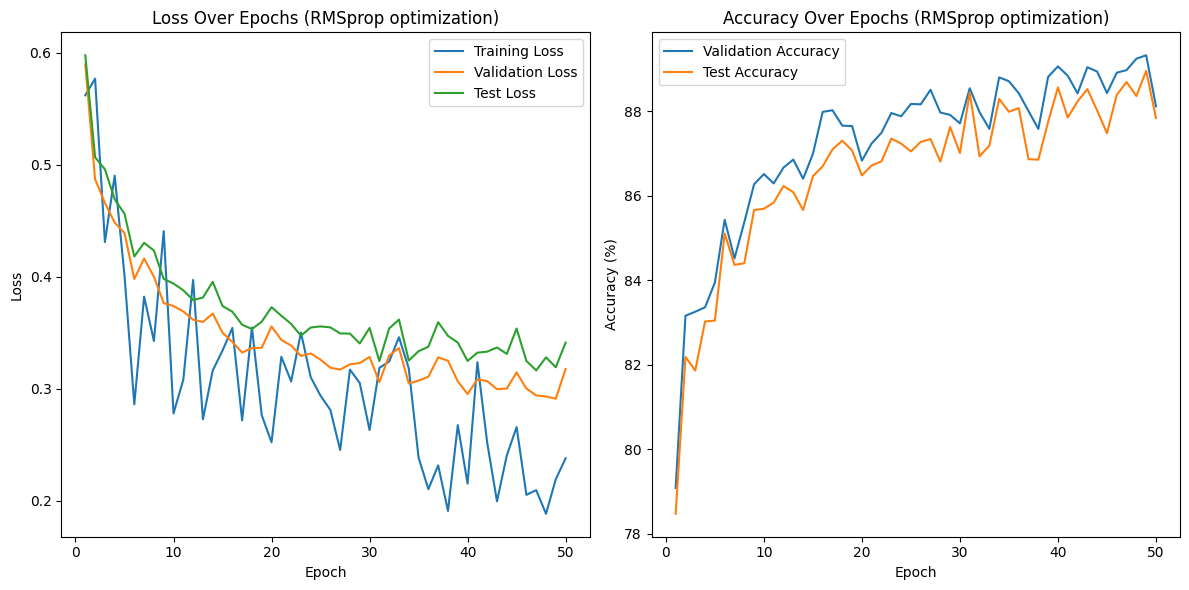

Train Loss Std: 0.0853
Validation Loss Std: 0.0569
Test Loss Std: 0.0539
Validation Accuracy Std: 0.0196
Test Accuracy Std: 0.0199


In [ ]:
#RMS Prop


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.0001

epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and RMSprop optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (RMSprop optimization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (RMSprop optimization)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")


Adam Optimizer and default initialization

  2%|▏         | 1/50 [00:22<18:00, 22.04s/it]

Epoch: 1/50, Train Loss: 0.6734, Validation Loss: 0.7205, Test Loss: 0.7320, Validation Accuracy: 76.13%, Test Accuracy: 74.91%


  4%|▍         | 2/50 [00:43<17:26, 21.80s/it]

Epoch: 2/50, Train Loss: 0.4776, Validation Loss: 0.5490, Test Loss: 0.5656, Validation Accuracy: 80.78%, Test Accuracy: 79.43%


  6%|▌         | 3/50 [01:04<16:43, 21.35s/it]

Epoch: 3/50, Train Loss: 0.4390, Validation Loss: 0.4881, Test Loss: 0.4950, Validation Accuracy: 82.64%, Test Accuracy: 82.16%


  8%|▊         | 4/50 [01:26<16:30, 21.52s/it]

Epoch: 4/50, Train Loss: 0.4902, Validation Loss: 0.4522, Test Loss: 0.4723, Validation Accuracy: 83.95%, Test Accuracy: 83.03%


 10%|█         | 5/50 [01:48<16:18, 21.73s/it]

Epoch: 5/50, Train Loss: 0.4800, Validation Loss: 0.4323, Test Loss: 0.4511, Validation Accuracy: 84.44%, Test Accuracy: 83.58%


 12%|█▏        | 6/50 [02:09<15:48, 21.57s/it]

Epoch: 6/50, Train Loss: 0.3790, Validation Loss: 0.4133, Test Loss: 0.4421, Validation Accuracy: 85.28%, Test Accuracy: 83.80%


 14%|█▍        | 7/50 [02:31<15:38, 21.83s/it]

Epoch: 7/50, Train Loss: 0.3746, Validation Loss: 0.4024, Test Loss: 0.4226, Validation Accuracy: 85.49%, Test Accuracy: 84.77%


 16%|█▌        | 8/50 [02:54<15:25, 22.03s/it]

Epoch: 8/50, Train Loss: 0.3837, Validation Loss: 0.3934, Test Loss: 0.4129, Validation Accuracy: 85.95%, Test Accuracy: 85.04%


 18%|█▊        | 9/50 [03:15<14:52, 21.78s/it]

Epoch: 9/50, Train Loss: 0.3373, Validation Loss: 0.3816, Test Loss: 0.3969, Validation Accuracy: 86.09%, Test Accuracy: 85.68%


 20%|██        | 10/50 [03:37<14:36, 21.91s/it]

Epoch: 10/50, Train Loss: 0.2972, Validation Loss: 0.3722, Test Loss: 0.4010, Validation Accuracy: 86.45%, Test Accuracy: 85.57%


 22%|██▏       | 11/50 [04:00<14:18, 22.02s/it]

Epoch: 11/50, Train Loss: 0.4321, Validation Loss: 0.3715, Test Loss: 0.3920, Validation Accuracy: 86.47%, Test Accuracy: 85.74%


 24%|██▍       | 12/50 [04:21<13:48, 21.79s/it]

Epoch: 12/50, Train Loss: 0.3324, Validation Loss: 0.3653, Test Loss: 0.3886, Validation Accuracy: 87.04%, Test Accuracy: 85.88%


 26%|██▌       | 13/50 [04:44<13:35, 22.05s/it]

Epoch: 13/50, Train Loss: 0.3479, Validation Loss: 0.3575, Test Loss: 0.3781, Validation Accuracy: 87.08%, Test Accuracy: 86.31%


 28%|██▊       | 14/50 [05:06<13:12, 22.03s/it]

Epoch: 14/50, Train Loss: 0.3679, Validation Loss: 0.3546, Test Loss: 0.3765, Validation Accuracy: 87.27%, Test Accuracy: 86.16%


 30%|███       | 15/50 [05:27<12:41, 21.77s/it]

Epoch: 15/50, Train Loss: 0.3131, Validation Loss: 0.3582, Test Loss: 0.3765, Validation Accuracy: 86.75%, Test Accuracy: 86.07%


 32%|███▏      | 16/50 [05:49<12:24, 21.89s/it]

Epoch: 16/50, Train Loss: 0.3148, Validation Loss: 0.3460, Test Loss: 0.3736, Validation Accuracy: 87.78%, Test Accuracy: 86.37%


 34%|███▍      | 17/50 [06:11<12:05, 21.99s/it]

Epoch: 17/50, Train Loss: 0.3024, Validation Loss: 0.3457, Test Loss: 0.3705, Validation Accuracy: 87.62%, Test Accuracy: 86.54%


 36%|███▌      | 18/50 [06:32<11:35, 21.72s/it]

Epoch: 18/50, Train Loss: 0.3252, Validation Loss: 0.3438, Test Loss: 0.3597, Validation Accuracy: 87.93%, Test Accuracy: 87.19%


 38%|███▊      | 19/50 [06:55<11:20, 21.94s/it]

Epoch: 19/50, Train Loss: 0.3086, Validation Loss: 0.3461, Test Loss: 0.3728, Validation Accuracy: 87.53%, Test Accuracy: 86.57%


 40%|████      | 20/50 [07:17<11:01, 22.05s/it]

Epoch: 20/50, Train Loss: 0.3298, Validation Loss: 0.3405, Test Loss: 0.3621, Validation Accuracy: 87.63%, Test Accuracy: 86.79%


 42%|████▏     | 21/50 [07:38<10:32, 21.80s/it]

Epoch: 21/50, Train Loss: 0.2639, Validation Loss: 0.3343, Test Loss: 0.3611, Validation Accuracy: 88.03%, Test Accuracy: 86.99%


 44%|████▍     | 22/50 [08:00<10:14, 21.93s/it]

Epoch: 22/50, Train Loss: 0.3071, Validation Loss: 0.3301, Test Loss: 0.3481, Validation Accuracy: 88.21%, Test Accuracy: 87.66%


 46%|████▌     | 23/50 [08:23<09:55, 22.06s/it]

Epoch: 23/50, Train Loss: 0.2483, Validation Loss: 0.3281, Test Loss: 0.3534, Validation Accuracy: 88.15%, Test Accuracy: 87.34%


 48%|████▊     | 24/50 [08:44<09:29, 21.89s/it]

Epoch: 24/50, Train Loss: 0.3987, Validation Loss: 0.3271, Test Loss: 0.3446, Validation Accuracy: 88.21%, Test Accuracy: 87.63%


 50%|█████     | 25/50 [09:06<09:09, 21.97s/it]

Epoch: 25/50, Train Loss: 0.2867, Validation Loss: 0.3271, Test Loss: 0.3527, Validation Accuracy: 88.20%, Test Accuracy: 87.34%


 52%|█████▏    | 26/50 [09:29<08:48, 22.04s/it]

Epoch: 26/50, Train Loss: 0.2771, Validation Loss: 0.3239, Test Loss: 0.3451, Validation Accuracy: 87.95%, Test Accuracy: 87.48%


 54%|█████▍    | 27/50 [09:50<08:23, 21.91s/it]

Epoch: 27/50, Train Loss: 0.3990, Validation Loss: 0.3212, Test Loss: 0.3389, Validation Accuracy: 88.59%, Test Accuracy: 87.89%


 56%|█████▌    | 28/50 [10:12<08:03, 21.97s/it]

Epoch: 28/50, Train Loss: 0.3089, Validation Loss: 0.3159, Test Loss: 0.3370, Validation Accuracy: 88.57%, Test Accuracy: 87.90%


 58%|█████▊    | 29/50 [10:35<07:44, 22.10s/it]

Epoch: 29/50, Train Loss: 0.2966, Validation Loss: 0.3147, Test Loss: 0.3473, Validation Accuracy: 88.75%, Test Accuracy: 87.65%


 60%|██████    | 30/50 [10:57<07:20, 22.01s/it]

Epoch: 30/50, Train Loss: 0.2586, Validation Loss: 0.3147, Test Loss: 0.3374, Validation Accuracy: 88.54%, Test Accuracy: 87.81%


 62%|██████▏   | 31/50 [11:19<06:58, 22.01s/it]

Epoch: 31/50, Train Loss: 0.2486, Validation Loss: 0.3165, Test Loss: 0.3331, Validation Accuracy: 88.56%, Test Accuracy: 88.14%


 64%|██████▍   | 32/50 [11:41<06:36, 22.02s/it]

Epoch: 32/50, Train Loss: 0.2100, Validation Loss: 0.3106, Test Loss: 0.3447, Validation Accuracy: 88.90%, Test Accuracy: 87.69%


 66%|██████▌   | 33/50 [12:03<06:15, 22.07s/it]

Epoch: 33/50, Train Loss: 0.2715, Validation Loss: 0.3119, Test Loss: 0.3315, Validation Accuracy: 88.66%, Test Accuracy: 88.09%


 68%|██████▊   | 34/50 [12:24<05:48, 21.79s/it]

Epoch: 34/50, Train Loss: 0.2929, Validation Loss: 0.3089, Test Loss: 0.3368, Validation Accuracy: 88.76%, Test Accuracy: 87.90%


 70%|███████   | 35/50 [12:46<05:30, 22.00s/it]

Epoch: 35/50, Train Loss: 0.1876, Validation Loss: 0.3073, Test Loss: 0.3245, Validation Accuracy: 88.83%, Test Accuracy: 88.31%


 72%|███████▏  | 36/50 [13:09<05:09, 22.11s/it]

Epoch: 36/50, Train Loss: 0.2514, Validation Loss: 0.3128, Test Loss: 0.3318, Validation Accuracy: 88.66%, Test Accuracy: 88.20%


 74%|███████▍  | 37/50 [13:30<04:44, 21.85s/it]

Epoch: 37/50, Train Loss: 0.1996, Validation Loss: 0.3020, Test Loss: 0.3236, Validation Accuracy: 88.94%, Test Accuracy: 88.06%


 76%|███████▌  | 38/50 [13:52<04:23, 21.95s/it]

Epoch: 38/50, Train Loss: 0.2987, Validation Loss: 0.3054, Test Loss: 0.3343, Validation Accuracy: 89.05%, Test Accuracy: 88.04%


 78%|███████▊  | 39/50 [14:15<04:02, 22.08s/it]

Epoch: 39/50, Train Loss: 0.3105, Validation Loss: 0.3057, Test Loss: 0.3305, Validation Accuracy: 88.92%, Test Accuracy: 88.20%


 80%|████████  | 40/50 [14:36<03:37, 21.79s/it]

Epoch: 40/50, Train Loss: 0.2394, Validation Loss: 0.3022, Test Loss: 0.3267, Validation Accuracy: 89.13%, Test Accuracy: 88.44%


 82%|████████▏ | 41/50 [14:58<03:17, 21.92s/it]

Epoch: 41/50, Train Loss: 0.2263, Validation Loss: 0.3021, Test Loss: 0.3241, Validation Accuracy: 88.75%, Test Accuracy: 88.36%


 84%|████████▍ | 42/50 [15:21<02:57, 22.21s/it]

Epoch: 42/50, Train Loss: 0.1753, Validation Loss: 0.3004, Test Loss: 0.3244, Validation Accuracy: 89.12%, Test Accuracy: 88.32%


 86%|████████▌ | 43/50 [15:42<02:34, 22.00s/it]

Epoch: 43/50, Train Loss: 0.2060, Validation Loss: 0.2987, Test Loss: 0.3282, Validation Accuracy: 89.29%, Test Accuracy: 88.12%


 88%|████████▊ | 44/50 [16:05<02:12, 22.11s/it]

Epoch: 44/50, Train Loss: 0.2827, Validation Loss: 0.2993, Test Loss: 0.3233, Validation Accuracy: 89.08%, Test Accuracy: 88.01%


 90%|█████████ | 45/50 [16:27<01:50, 22.15s/it]

Epoch: 45/50, Train Loss: 0.2275, Validation Loss: 0.3022, Test Loss: 0.3211, Validation Accuracy: 89.02%, Test Accuracy: 88.56%


 92%|█████████▏| 46/50 [16:48<01:27, 21.93s/it]

Epoch: 46/50, Train Loss: 0.2676, Validation Loss: 0.3022, Test Loss: 0.3238, Validation Accuracy: 89.12%, Test Accuracy: 88.35%


 94%|█████████▍| 47/50 [17:11<01:06, 22.02s/it]

Epoch: 47/50, Train Loss: 0.1915, Validation Loss: 0.3014, Test Loss: 0.3210, Validation Accuracy: 89.09%, Test Accuracy: 88.22%


 96%|█████████▌| 48/50 [17:33<00:44, 22.08s/it]

Epoch: 48/50, Train Loss: 0.2424, Validation Loss: 0.3109, Test Loss: 0.3356, Validation Accuracy: 88.91%, Test Accuracy: 87.77%


 98%|█████████▊| 49/50 [17:55<00:21, 21.98s/it]

Epoch: 49/50, Train Loss: 0.1773, Validation Loss: 0.2997, Test Loss: 0.3308, Validation Accuracy: 89.09%, Test Accuracy: 88.23%


100%|██████████| 50/50 [18:17<00:00, 21.94s/it]

Epoch: 50/50, Train Loss: 0.2338, Validation Loss: 0.3016, Test Loss: 0.3250, Validation Accuracy: 89.30%, Test Accuracy: 88.46%


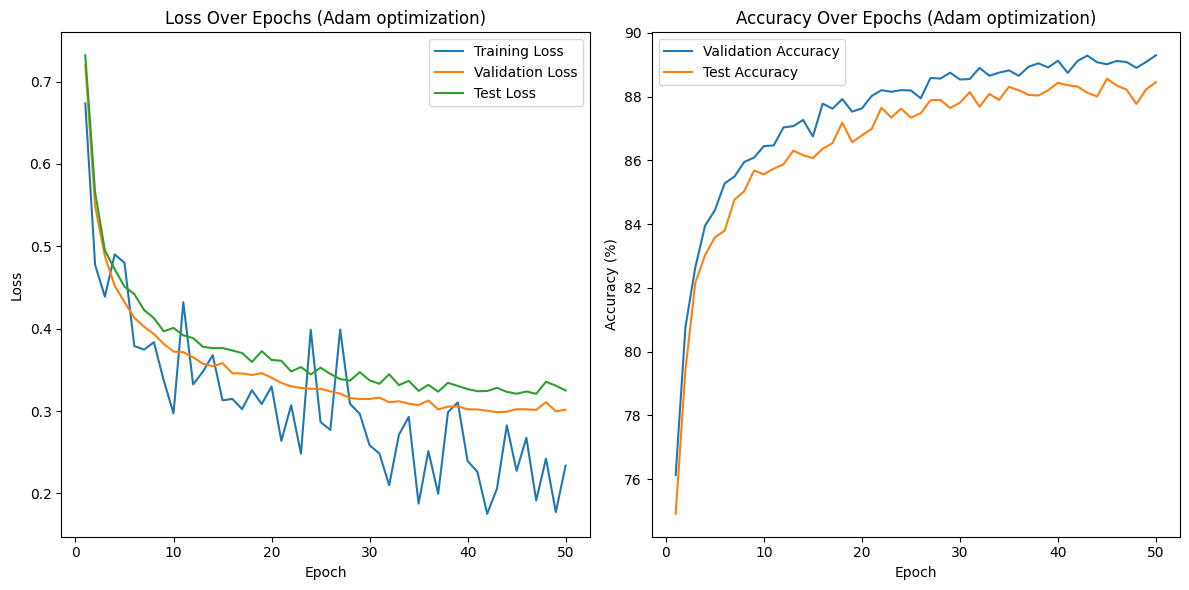

Train Loss Std: 0.0937
Validation Loss Std: 0.0738
Test Loss Std: 0.0715
Validation Accuracy Std: 0.0240
Test Accuracy Std: 0.0248


In [ ]:
#Adam

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
#learning_rate = 0.0001  # Adjust the learning rate if needed
learning_rate = 0.00008
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and Adam optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")



# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Adam optimization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (Adam optimization)')
plt.legend()
plt.tight_layout()
plt.show()


# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")


Dropout Regularization

  2%|▏         | 1/50 [00:22<18:05, 22.14s/it]

Epoch: 1/50, Train Loss: 0.9660, Validation Loss: 0.8943, Test Loss: 0.9067, Validation Accuracy: 70.06%, Test Accuracy: 68.92%


  4%|▍         | 2/50 [00:43<17:30, 21.89s/it]

Epoch: 2/50, Train Loss: 0.7462, Validation Loss: 0.6942, Test Loss: 0.7175, Validation Accuracy: 76.45%, Test Accuracy: 74.97%


  6%|▌         | 3/50 [01:05<16:57, 21.65s/it]

Epoch: 3/50, Train Loss: 0.6343, Validation Loss: 0.6104, Test Loss: 0.6170, Validation Accuracy: 78.65%, Test Accuracy: 78.31%


  8%|▊         | 4/50 [01:27<16:46, 21.87s/it]

Epoch: 4/50, Train Loss: 0.5743, Validation Loss: 0.5595, Test Loss: 0.5681, Validation Accuracy: 80.47%, Test Accuracy: 79.79%


 10%|█         | 5/50 [01:49<16:20, 21.78s/it]

Epoch: 5/50, Train Loss: 0.5731, Validation Loss: 0.5275, Test Loss: 0.5385, Validation Accuracy: 81.46%, Test Accuracy: 80.64%


 12%|█▏        | 6/50 [02:10<15:58, 21.78s/it]

Epoch: 6/50, Train Loss: 0.6017, Validation Loss: 0.5075, Test Loss: 0.5232, Validation Accuracy: 82.08%, Test Accuracy: 81.03%


 14%|█▍        | 7/50 [02:32<15:40, 21.87s/it]

Epoch: 7/50, Train Loss: 0.4428, Validation Loss: 0.4903, Test Loss: 0.5117, Validation Accuracy: 82.70%, Test Accuracy: 81.62%


 16%|█▌        | 8/50 [02:55<15:21, 21.95s/it]

Epoch: 8/50, Train Loss: 0.5842, Validation Loss: 0.4788, Test Loss: 0.5066, Validation Accuracy: 83.42%, Test Accuracy: 82.01%


 18%|█▊        | 9/50 [03:15<14:46, 21.62s/it]

Epoch: 9/50, Train Loss: 0.4489, Validation Loss: 0.4642, Test Loss: 0.4867, Validation Accuracy: 83.57%, Test Accuracy: 82.17%


 20%|██        | 10/50 [03:38<14:32, 21.80s/it]

Epoch: 10/50, Train Loss: 0.4840, Validation Loss: 0.4562, Test Loss: 0.4736, Validation Accuracy: 83.67%, Test Accuracy: 83.27%


 22%|██▏       | 11/50 [04:00<14:12, 21.87s/it]

Epoch: 11/50, Train Loss: 0.4800, Validation Loss: 0.4444, Test Loss: 0.4698, Validation Accuracy: 84.56%, Test Accuracy: 82.80%


 24%|██▍       | 12/50 [04:21<13:43, 21.68s/it]

Epoch: 12/50, Train Loss: 0.4410, Validation Loss: 0.4364, Test Loss: 0.4564, Validation Accuracy: 84.30%, Test Accuracy: 83.78%


 26%|██▌       | 13/50 [04:43<13:30, 21.90s/it]

Epoch: 13/50, Train Loss: 0.5179, Validation Loss: 0.4295, Test Loss: 0.4548, Validation Accuracy: 84.64%, Test Accuracy: 83.76%


 28%|██▊       | 14/50 [05:05<13:11, 21.99s/it]

Epoch: 14/50, Train Loss: 0.4265, Validation Loss: 0.4211, Test Loss: 0.4500, Validation Accuracy: 85.05%, Test Accuracy: 83.94%


 30%|███       | 15/50 [05:27<12:40, 21.72s/it]

Epoch: 15/50, Train Loss: 0.4374, Validation Loss: 0.4176, Test Loss: 0.4352, Validation Accuracy: 85.11%, Test Accuracy: 84.35%


 32%|███▏      | 16/50 [05:49<12:22, 21.84s/it]

Epoch: 16/50, Train Loss: 0.4938, Validation Loss: 0.4193, Test Loss: 0.4409, Validation Accuracy: 84.68%, Test Accuracy: 84.30%


 34%|███▍      | 17/50 [06:11<12:03, 21.94s/it]

Epoch: 17/50, Train Loss: 0.4066, Validation Loss: 0.4115, Test Loss: 0.4416, Validation Accuracy: 85.15%, Test Accuracy: 84.10%


 36%|███▌      | 18/50 [06:32<11:33, 21.66s/it]

Epoch: 18/50, Train Loss: 0.4636, Validation Loss: 0.4000, Test Loss: 0.4223, Validation Accuracy: 85.88%, Test Accuracy: 84.43%


 38%|███▊      | 19/50 [06:54<11:17, 21.85s/it]

Epoch: 19/50, Train Loss: 0.4409, Validation Loss: 0.3987, Test Loss: 0.4212, Validation Accuracy: 85.74%, Test Accuracy: 84.92%


 40%|████      | 20/50 [07:17<11:00, 22.02s/it]

Epoch: 20/50, Train Loss: 0.4272, Validation Loss: 0.3989, Test Loss: 0.4227, Validation Accuracy: 85.44%, Test Accuracy: 84.80%


 42%|████▏     | 21/50 [07:38<10:30, 21.75s/it]

Epoch: 21/50, Train Loss: 0.4835, Validation Loss: 0.3953, Test Loss: 0.4213, Validation Accuracy: 85.82%, Test Accuracy: 84.63%


 44%|████▍     | 22/50 [08:00<10:11, 21.84s/it]

Epoch: 22/50, Train Loss: 0.4209, Validation Loss: 0.3853, Test Loss: 0.4081, Validation Accuracy: 85.97%, Test Accuracy: 84.95%


 46%|████▌     | 23/50 [08:22<09:50, 21.86s/it]

Epoch: 23/50, Train Loss: 0.3130, Validation Loss: 0.3829, Test Loss: 0.4087, Validation Accuracy: 85.91%, Test Accuracy: 85.21%


 48%|████▊     | 24/50 [08:43<09:21, 21.61s/it]

Epoch: 24/50, Train Loss: 0.4577, Validation Loss: 0.3817, Test Loss: 0.4025, Validation Accuracy: 86.20%, Test Accuracy: 85.47%


 50%|█████     | 25/50 [09:05<09:04, 21.79s/it]

Epoch: 25/50, Train Loss: 0.3456, Validation Loss: 0.3753, Test Loss: 0.4023, Validation Accuracy: 86.43%, Test Accuracy: 85.35%


 52%|█████▏    | 26/50 [09:27<08:45, 21.90s/it]

Epoch: 26/50, Train Loss: 0.3653, Validation Loss: 0.3788, Test Loss: 0.3985, Validation Accuracy: 86.18%, Test Accuracy: 85.41%


 54%|█████▍    | 27/50 [09:48<08:18, 21.68s/it]

Epoch: 27/50, Train Loss: 0.3920, Validation Loss: 0.3727, Test Loss: 0.3955, Validation Accuracy: 86.30%, Test Accuracy: 85.59%


 56%|█████▌    | 28/50 [10:10<08:00, 21.85s/it]

Epoch: 28/50, Train Loss: 0.3075, Validation Loss: 0.3694, Test Loss: 0.3933, Validation Accuracy: 86.33%, Test Accuracy: 85.97%


 58%|█████▊    | 29/50 [10:33<07:42, 22.00s/it]

Epoch: 29/50, Train Loss: 0.3264, Validation Loss: 0.3635, Test Loss: 0.3821, Validation Accuracy: 86.66%, Test Accuracy: 86.22%


 60%|██████    | 30/50 [10:54<07:14, 21.74s/it]

Epoch: 30/50, Train Loss: 0.4358, Validation Loss: 0.3624, Test Loss: 0.3955, Validation Accuracy: 86.69%, Test Accuracy: 85.97%


 62%|██████▏   | 31/50 [11:16<06:55, 21.89s/it]

Epoch: 31/50, Train Loss: 0.3828, Validation Loss: 0.3585, Test Loss: 0.3787, Validation Accuracy: 87.21%, Test Accuracy: 86.24%


 64%|██████▍   | 32/50 [11:38<06:36, 22.02s/it]

Epoch: 32/50, Train Loss: 0.3621, Validation Loss: 0.3561, Test Loss: 0.3783, Validation Accuracy: 87.01%, Test Accuracy: 86.34%


 66%|██████▌   | 33/50 [12:00<06:10, 21.80s/it]

Epoch: 33/50, Train Loss: 0.3729, Validation Loss: 0.3602, Test Loss: 0.3929, Validation Accuracy: 86.98%, Test Accuracy: 85.99%


 68%|██████▊   | 34/50 [12:22<05:51, 21.98s/it]

Epoch: 34/50, Train Loss: 0.2957, Validation Loss: 0.3574, Test Loss: 0.3785, Validation Accuracy: 86.84%, Test Accuracy: 86.07%


 70%|███████   | 35/50 [12:45<05:31, 22.10s/it]

Epoch: 35/50, Train Loss: 0.3405, Validation Loss: 0.3537, Test Loss: 0.3805, Validation Accuracy: 87.08%, Test Accuracy: 86.33%


 72%|███████▏  | 36/50 [13:06<05:05, 21.83s/it]

Epoch: 36/50, Train Loss: 0.3599, Validation Loss: 0.3504, Test Loss: 0.3748, Validation Accuracy: 86.96%, Test Accuracy: 86.23%


 74%|███████▍  | 37/50 [13:28<04:46, 22.01s/it]

Epoch: 37/50, Train Loss: 0.3462, Validation Loss: 0.3510, Test Loss: 0.3772, Validation Accuracy: 87.24%, Test Accuracy: 86.43%


 76%|███████▌  | 38/50 [13:50<04:23, 21.98s/it]

Epoch: 38/50, Train Loss: 0.2806, Validation Loss: 0.3455, Test Loss: 0.3714, Validation Accuracy: 87.65%, Test Accuracy: 86.57%


 78%|███████▊  | 39/50 [14:11<03:58, 21.72s/it]

Epoch: 39/50, Train Loss: 0.3103, Validation Loss: 0.3467, Test Loss: 0.3722, Validation Accuracy: 87.34%, Test Accuracy: 86.70%


 80%|████████  | 40/50 [14:34<03:39, 21.91s/it]

Epoch: 40/50, Train Loss: 0.3825, Validation Loss: 0.3419, Test Loss: 0.3671, Validation Accuracy: 87.70%, Test Accuracy: 86.83%


 82%|████████▏ | 41/50 [14:55<03:16, 21.89s/it]

Epoch: 41/50, Train Loss: 0.3407, Validation Loss: 0.3394, Test Loss: 0.3636, Validation Accuracy: 87.73%, Test Accuracy: 87.11%


 84%|████████▍ | 42/50 [15:16<02:52, 21.59s/it]

Epoch: 42/50, Train Loss: 0.3146, Validation Loss: 0.3435, Test Loss: 0.3643, Validation Accuracy: 87.70%, Test Accuracy: 86.91%


 86%|████████▌ | 43/50 [15:38<02:31, 21.59s/it]

Epoch: 43/50, Train Loss: 0.2863, Validation Loss: 0.3448, Test Loss: 0.3664, Validation Accuracy: 87.50%, Test Accuracy: 86.85%


 88%|████████▊ | 44/50 [16:00<02:10, 21.71s/it]

Epoch: 44/50, Train Loss: 0.2998, Validation Loss: 0.3392, Test Loss: 0.3803, Validation Accuracy: 87.92%, Test Accuracy: 86.48%


 90%|█████████ | 45/50 [16:20<01:46, 21.35s/it]

Epoch: 45/50, Train Loss: 0.3888, Validation Loss: 0.3342, Test Loss: 0.3570, Validation Accuracy: 87.92%, Test Accuracy: 87.36%


 92%|█████████▏| 46/50 [16:42<01:25, 21.46s/it]

Epoch: 46/50, Train Loss: 0.3343, Validation Loss: 0.3357, Test Loss: 0.3580, Validation Accuracy: 87.86%, Test Accuracy: 86.85%


 94%|█████████▍| 47/50 [17:04<01:04, 21.56s/it]

Epoch: 47/50, Train Loss: 0.2414, Validation Loss: 0.3338, Test Loss: 0.3525, Validation Accuracy: 87.85%, Test Accuracy: 87.30%


 96%|█████████▌| 48/50 [17:25<00:42, 21.30s/it]

Epoch: 48/50, Train Loss: 0.3852, Validation Loss: 0.3331, Test Loss: 0.3639, Validation Accuracy: 87.90%, Test Accuracy: 86.98%


 98%|█████████▊| 49/50 [17:47<00:21, 21.54s/it]

Epoch: 49/50, Train Loss: 0.2417, Validation Loss: 0.3289, Test Loss: 0.3539, Validation Accuracy: 88.11%, Test Accuracy: 87.18%


100%|██████████| 50/50 [18:08<00:00, 21.78s/it]

Epoch: 50/50, Train Loss: 0.2809, Validation Loss: 0.3295, Test Loss: 0.3526, Validation Accuracy: 87.92%, Test Accuracy: 87.00%


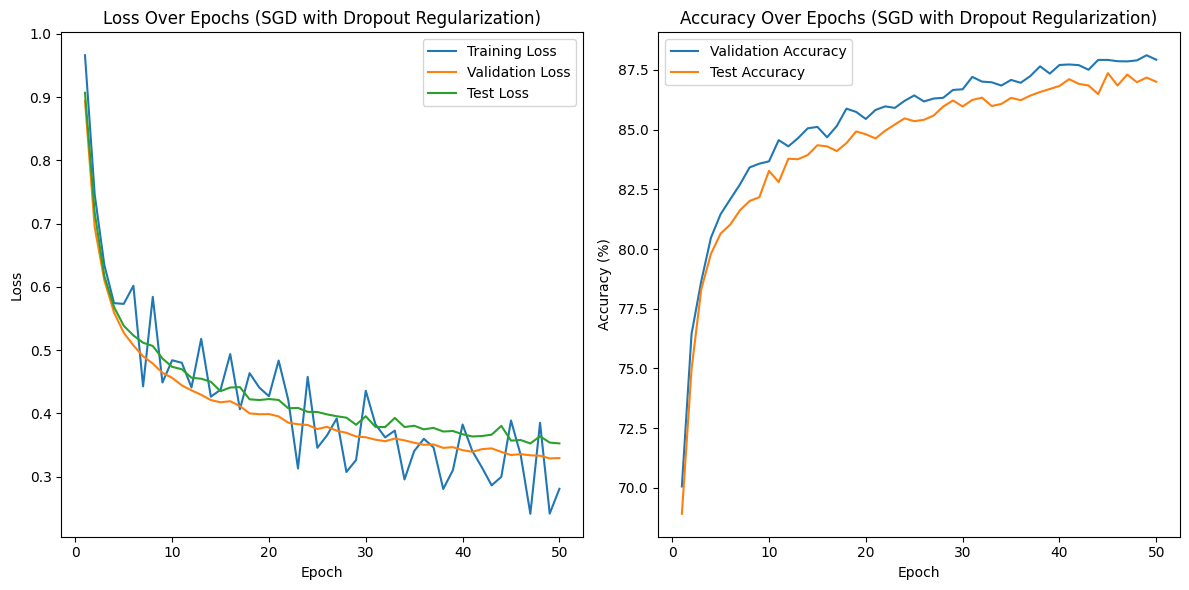

Train Loss Std: 0.1301
Validation Loss Std: 0.1021
Test Loss Std: 0.0991
Validation Accuracy Std: 0.0327
Test Accuracy Std: 0.0334


In [ ]:
#Dropout

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers and dropout
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2, dropout_prob):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
dropout_prob = 0.1  # Adjust the dropout probability as needed, 0.5
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout_prob=dropout_prob)

# Define the learning rate and epochs number
learning_rate = 0.02
#learning_rate = 0.01
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD with Dropout Regularization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD with Dropout Regularization)')
plt.legend()
plt.tight_layout()
plt.show()

# ... (previous code)

# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")




Random Normal Initialization

  2%|▏         | 1/50 [00:20<16:47, 20.56s/it]

Epoch: 1/50, Train Loss: 2.2640, Validation Loss: 2.2606, Test Loss: 2.2608, Validation Accuracy: 28.88%, Test Accuracy: 29.35%


  4%|▍         | 2/50 [00:42<17:00, 21.25s/it]

Epoch: 2/50, Train Loss: 1.5960, Validation Loss: 1.5847, Test Loss: 1.5908, Validation Accuracy: 41.40%, Test Accuracy: 41.14%


  6%|▌         | 3/50 [01:03<16:46, 21.41s/it]

Epoch: 3/50, Train Loss: 1.1814, Validation Loss: 1.0876, Test Loss: 1.0970, Validation Accuracy: 58.31%, Test Accuracy: 57.88%


  8%|▊         | 4/50 [01:24<16:14, 21.18s/it]

Epoch: 4/50, Train Loss: 0.8199, Validation Loss: 0.9604, Test Loss: 0.9835, Validation Accuracy: 61.25%, Test Accuracy: 60.67%


 10%|█         | 5/50 [01:46<16:03, 21.40s/it]

Epoch: 5/50, Train Loss: 0.8374, Validation Loss: 0.8255, Test Loss: 0.8374, Validation Accuracy: 67.39%, Test Accuracy: 67.40%


 12%|█▏        | 6/50 [02:07<15:32, 21.19s/it]

Epoch: 6/50, Train Loss: 0.6599, Validation Loss: 0.7668, Test Loss: 0.7757, Validation Accuracy: 68.41%, Test Accuracy: 69.04%


 14%|█▍        | 7/50 [02:28<15:12, 21.22s/it]

Epoch: 7/50, Train Loss: 0.6361, Validation Loss: 0.7305, Test Loss: 0.7424, Validation Accuracy: 71.15%, Test Accuracy: 70.53%


 16%|█▌        | 8/50 [02:50<14:55, 21.32s/it]

Epoch: 8/50, Train Loss: 0.6903, Validation Loss: 0.7101, Test Loss: 0.7170, Validation Accuracy: 71.95%, Test Accuracy: 71.65%


 18%|█▊        | 9/50 [03:10<14:21, 21.01s/it]

Epoch: 9/50, Train Loss: 0.5725, Validation Loss: 0.6537, Test Loss: 0.6635, Validation Accuracy: 76.43%, Test Accuracy: 75.98%


 20%|██        | 10/50 [03:32<14:07, 21.19s/it]

Epoch: 10/50, Train Loss: 0.6618, Validation Loss: 0.6515, Test Loss: 0.6539, Validation Accuracy: 76.75%, Test Accuracy: 76.52%


 22%|██▏       | 11/50 [03:53<13:49, 21.27s/it]

Epoch: 11/50, Train Loss: 0.5872, Validation Loss: 0.5919, Test Loss: 0.5972, Validation Accuracy: 79.20%, Test Accuracy: 78.96%


 24%|██▍       | 12/50 [04:14<13:24, 21.17s/it]

Epoch: 12/50, Train Loss: 0.5287, Validation Loss: 0.5607, Test Loss: 0.5734, Validation Accuracy: 80.26%, Test Accuracy: 79.27%


 26%|██▌       | 13/50 [04:35<13:06, 21.27s/it]

Epoch: 13/50, Train Loss: 0.5401, Validation Loss: 0.5557, Test Loss: 0.5702, Validation Accuracy: 79.93%, Test Accuracy: 79.08%


 28%|██▊       | 14/50 [04:56<12:38, 21.06s/it]

Epoch: 14/50, Train Loss: 0.5300, Validation Loss: 0.5442, Test Loss: 0.5573, Validation Accuracy: 80.37%, Test Accuracy: 79.87%


 30%|███       | 15/50 [05:17<12:18, 21.09s/it]

Epoch: 15/50, Train Loss: 0.5407, Validation Loss: 0.5306, Test Loss: 0.5491, Validation Accuracy: 80.88%, Test Accuracy: 80.50%


 32%|███▏      | 16/50 [05:39<12:03, 21.28s/it]

Epoch: 16/50, Train Loss: 0.5906, Validation Loss: 0.5227, Test Loss: 0.5387, Validation Accuracy: 80.73%, Test Accuracy: 80.42%


 34%|███▍      | 17/50 [05:59<11:34, 21.06s/it]

Epoch: 17/50, Train Loss: 0.4579, Validation Loss: 0.5345, Test Loss: 0.5476, Validation Accuracy: 79.78%, Test Accuracy: 79.63%


 36%|███▌      | 18/50 [06:21<11:19, 21.23s/it]

Epoch: 18/50, Train Loss: 0.5384, Validation Loss: 0.4878, Test Loss: 0.5057, Validation Accuracy: 82.82%, Test Accuracy: 81.72%


 38%|███▊      | 19/50 [06:42<10:57, 21.22s/it]

Epoch: 19/50, Train Loss: 0.4706, Validation Loss: 0.4818, Test Loss: 0.4966, Validation Accuracy: 82.63%, Test Accuracy: 82.29%


 40%|████      | 20/50 [07:03<10:34, 21.14s/it]

Epoch: 20/50, Train Loss: 0.5073, Validation Loss: 0.4753, Test Loss: 0.4898, Validation Accuracy: 82.93%, Test Accuracy: 82.37%


 42%|████▏     | 21/50 [07:25<10:16, 21.28s/it]

Epoch: 21/50, Train Loss: 0.4331, Validation Loss: 0.4968, Test Loss: 0.5152, Validation Accuracy: 81.75%, Test Accuracy: 81.49%


 44%|████▍     | 22/50 [07:46<09:52, 21.15s/it]

Epoch: 22/50, Train Loss: 0.4533, Validation Loss: 0.4615, Test Loss: 0.4807, Validation Accuracy: 83.65%, Test Accuracy: 82.39%


 46%|████▌     | 23/50 [08:07<09:31, 21.18s/it]

Epoch: 23/50, Train Loss: 0.4274, Validation Loss: 0.4738, Test Loss: 0.4991, Validation Accuracy: 82.79%, Test Accuracy: 81.53%


 48%|████▊     | 24/50 [08:28<09:12, 21.26s/it]

Epoch: 24/50, Train Loss: 0.4444, Validation Loss: 0.4441, Test Loss: 0.4652, Validation Accuracy: 83.97%, Test Accuracy: 83.28%


 50%|█████     | 25/50 [08:49<08:46, 21.04s/it]

Epoch: 25/50, Train Loss: 0.3598, Validation Loss: 0.4471, Test Loss: 0.4675, Validation Accuracy: 83.83%, Test Accuracy: 83.50%


 52%|█████▏    | 26/50 [09:10<08:27, 21.14s/it]

Epoch: 26/50, Train Loss: 0.4043, Validation Loss: 0.4387, Test Loss: 0.4547, Validation Accuracy: 83.99%, Test Accuracy: 83.65%


 54%|█████▍    | 27/50 [09:32<08:10, 21.31s/it]

Epoch: 27/50, Train Loss: 0.3816, Validation Loss: 0.4362, Test Loss: 0.4648, Validation Accuracy: 83.94%, Test Accuracy: 83.13%


 56%|█████▌    | 28/50 [09:52<07:42, 21.04s/it]

Epoch: 28/50, Train Loss: 0.4798, Validation Loss: 0.4302, Test Loss: 0.4519, Validation Accuracy: 84.28%, Test Accuracy: 83.83%


 58%|█████▊    | 29/50 [10:14<07:24, 21.17s/it]

Epoch: 29/50, Train Loss: 0.3923, Validation Loss: 0.4258, Test Loss: 0.4500, Validation Accuracy: 84.48%, Test Accuracy: 84.02%


 60%|██████    | 30/50 [10:34<07:00, 21.02s/it]

Epoch: 30/50, Train Loss: 0.5072, Validation Loss: 0.4857, Test Loss: 0.5069, Validation Accuracy: 81.51%, Test Accuracy: 81.17%


 62%|██████▏   | 31/50 [10:56<06:39, 21.04s/it]

Epoch: 31/50, Train Loss: 0.4537, Validation Loss: 0.4230, Test Loss: 0.4441, Validation Accuracy: 84.71%, Test Accuracy: 83.80%


 64%|██████▍   | 32/50 [11:17<06:20, 21.16s/it]

Epoch: 32/50, Train Loss: 0.3956, Validation Loss: 0.4168, Test Loss: 0.4311, Validation Accuracy: 84.67%, Test Accuracy: 84.49%


 66%|██████▌   | 33/50 [11:37<05:55, 20.93s/it]

Epoch: 33/50, Train Loss: 0.5293, Validation Loss: 0.4350, Test Loss: 0.4642, Validation Accuracy: 83.83%, Test Accuracy: 83.20%


 68%|██████▊   | 34/50 [11:59<05:40, 21.25s/it]

Epoch: 34/50, Train Loss: 0.3732, Validation Loss: 0.4120, Test Loss: 0.4384, Validation Accuracy: 85.16%, Test Accuracy: 84.04%


 70%|███████   | 35/50 [12:21<05:20, 21.36s/it]

Epoch: 35/50, Train Loss: 0.3422, Validation Loss: 0.4056, Test Loss: 0.4234, Validation Accuracy: 85.18%, Test Accuracy: 84.87%


 72%|███████▏  | 36/50 [12:41<04:55, 21.09s/it]

Epoch: 36/50, Train Loss: 0.4200, Validation Loss: 0.4324, Test Loss: 0.4636, Validation Accuracy: 84.30%, Test Accuracy: 83.51%


 74%|███████▍  | 37/50 [13:03<04:35, 21.22s/it]

Epoch: 37/50, Train Loss: 0.4317, Validation Loss: 0.4065, Test Loss: 0.4407, Validation Accuracy: 85.32%, Test Accuracy: 84.13%


 76%|███████▌  | 38/50 [13:24<04:13, 21.11s/it]

Epoch: 38/50, Train Loss: 0.2873, Validation Loss: 0.3939, Test Loss: 0.4168, Validation Accuracy: 85.73%, Test Accuracy: 85.26%


 78%|███████▊  | 39/50 [13:45<03:51, 21.05s/it]

Epoch: 39/50, Train Loss: 0.4154, Validation Loss: 0.3911, Test Loss: 0.4132, Validation Accuracy: 85.99%, Test Accuracy: 85.26%


 80%|████████  | 40/50 [14:06<03:31, 21.14s/it]

Epoch: 40/50, Train Loss: 0.3971, Validation Loss: 0.4011, Test Loss: 0.4251, Validation Accuracy: 85.67%, Test Accuracy: 84.80%


 82%|████████▏ | 41/50 [14:27<03:08, 20.95s/it]

Epoch: 41/50, Train Loss: 0.4179, Validation Loss: 0.3981, Test Loss: 0.4179, Validation Accuracy: 85.54%, Test Accuracy: 85.00%


 84%|████████▍ | 42/50 [14:48<02:49, 21.19s/it]

Epoch: 42/50, Train Loss: 0.4264, Validation Loss: 0.3897, Test Loss: 0.4139, Validation Accuracy: 85.98%, Test Accuracy: 85.15%


 86%|████████▌ | 43/50 [15:10<02:28, 21.26s/it]

Epoch: 43/50, Train Loss: 0.3997, Validation Loss: 0.3907, Test Loss: 0.4146, Validation Accuracy: 85.95%, Test Accuracy: 85.36%


 88%|████████▊ | 44/50 [15:30<02:06, 21.05s/it]

Epoch: 44/50, Train Loss: 0.3293, Validation Loss: 0.3794, Test Loss: 0.3977, Validation Accuracy: 86.28%, Test Accuracy: 85.91%


 90%|█████████ | 45/50 [15:52<01:46, 21.29s/it]

Epoch: 45/50, Train Loss: 0.3313, Validation Loss: 0.3849, Test Loss: 0.4154, Validation Accuracy: 85.97%, Test Accuracy: 85.40%


 92%|█████████▏| 46/50 [16:13<01:25, 21.26s/it]

Epoch: 46/50, Train Loss: 0.5389, Validation Loss: 0.3928, Test Loss: 0.4089, Validation Accuracy: 85.48%, Test Accuracy: 85.51%


 94%|█████████▍| 47/50 [16:34<01:03, 21.18s/it]

Epoch: 47/50, Train Loss: 0.3941, Validation Loss: 0.3778, Test Loss: 0.4122, Validation Accuracy: 86.54%, Test Accuracy: 85.35%


 96%|█████████▌| 48/50 [16:56<00:42, 21.31s/it]

Epoch: 48/50, Train Loss: 0.3016, Validation Loss: 0.3772, Test Loss: 0.4017, Validation Accuracy: 86.45%, Test Accuracy: 85.79%


 98%|█████████▊| 49/50 [17:17<00:21, 21.31s/it]

Epoch: 49/50, Train Loss: 0.3091, Validation Loss: 0.3750, Test Loss: 0.3953, Validation Accuracy: 86.42%, Test Accuracy: 85.47%


100%|██████████| 50/50 [17:39<00:00, 21.18s/it]

Epoch: 50/50, Train Loss: 0.3324, Validation Loss: 0.3680, Test Loss: 0.3937, Validation Accuracy: 86.71%, Test Accuracy: 85.93%


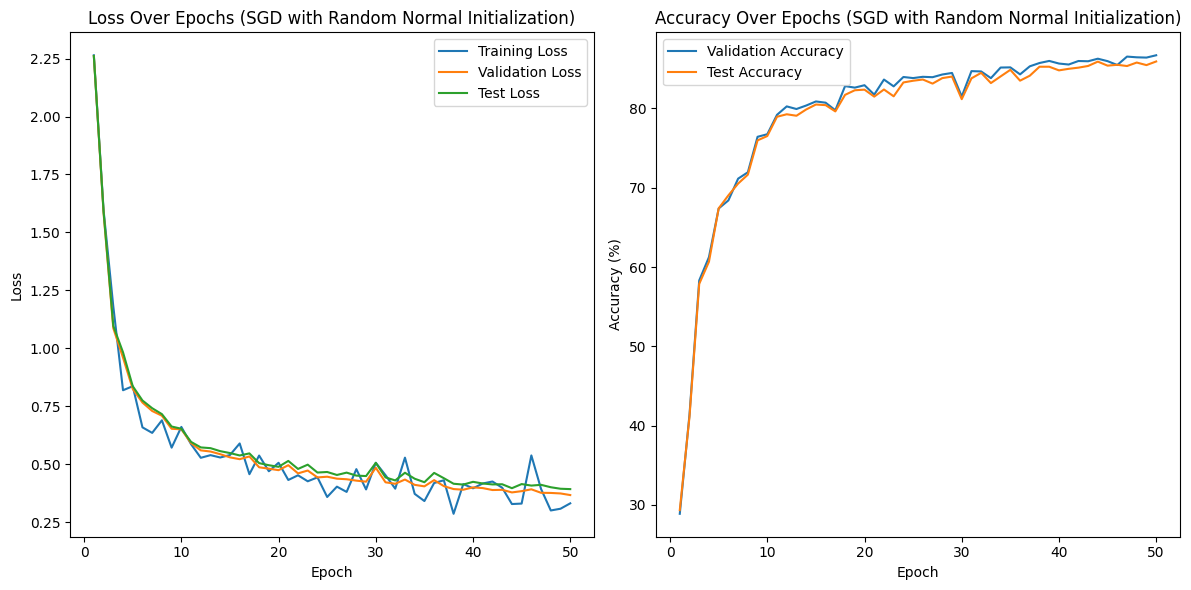

Train Loss Std: 0.3292
Validation Loss Std: 0.3237
Test Loss Std: 0.3190
Validation Accuracy Std: 0.1110
Test Accuracy Std: 0.1091


In [ ]:
#init random normal

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers and random normal initialization
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        nn.init.normal_(self.fc1.weight, mean=0, std=0.01)  # Random normal initialization
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        nn.init.normal_(self.fc2.weight, mean=0, std=0.01)  # Random normal initialization
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        nn.init.normal_(self.fc3.weight, mean=0, std=0.01)  # Random normal initialization

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.02
#learning_rate = 0.01
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD with Random Normal Initialization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD with Random Normal Initialization)')
plt.legend()
plt.tight_layout()
plt.show()

# ... (previous code)

# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations

print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")


Xavier Normal initilization

  2%|▏         | 1/50 [00:21<17:49, 21.83s/it]

Epoch: 1/50, Train Loss: 0.6645, Validation Loss: 0.6463, Test Loss: 0.6531, Validation Accuracy: 77.07%, Test Accuracy: 77.51%


  4%|▍         | 2/50 [00:42<16:57, 21.20s/it]

Epoch: 2/50, Train Loss: 0.4911, Validation Loss: 0.5140, Test Loss: 0.5221, Validation Accuracy: 82.16%, Test Accuracy: 81.91%


  6%|▌         | 3/50 [01:04<16:46, 21.41s/it]

Epoch: 3/50, Train Loss: 0.5184, Validation Loss: 0.4776, Test Loss: 0.4918, Validation Accuracy: 83.36%, Test Accuracy: 82.93%


  8%|▊         | 4/50 [01:25<16:28, 21.49s/it]

Epoch: 4/50, Train Loss: 0.3909, Validation Loss: 0.4752, Test Loss: 0.5009, Validation Accuracy: 83.13%, Test Accuracy: 82.41%


 10%|█         | 5/50 [01:46<15:51, 21.15s/it]

Epoch: 5/50, Train Loss: 0.4135, Validation Loss: 0.4540, Test Loss: 0.4820, Validation Accuracy: 83.89%, Test Accuracy: 83.10%


 12%|█▏        | 6/50 [02:07<15:31, 21.16s/it]

Epoch: 6/50, Train Loss: 0.4579, Validation Loss: 0.4508, Test Loss: 0.4696, Validation Accuracy: 83.70%, Test Accuracy: 83.06%


 14%|█▍        | 7/50 [02:28<15:11, 21.19s/it]

Epoch: 7/50, Train Loss: 0.4536, Validation Loss: 0.4572, Test Loss: 0.4830, Validation Accuracy: 83.35%, Test Accuracy: 82.35%


 16%|█▌        | 8/50 [02:49<14:41, 20.98s/it]

Epoch: 8/50, Train Loss: 0.3655, Validation Loss: 0.4097, Test Loss: 0.4387, Validation Accuracy: 85.17%, Test Accuracy: 84.43%


 18%|█▊        | 9/50 [03:10<14:27, 21.15s/it]

Epoch: 9/50, Train Loss: 0.3399, Validation Loss: 0.4186, Test Loss: 0.4405, Validation Accuracy: 84.78%, Test Accuracy: 84.06%


 20%|██        | 10/50 [03:31<14:04, 21.10s/it]

Epoch: 10/50, Train Loss: 0.3719, Validation Loss: 0.3991, Test Loss: 0.4149, Validation Accuracy: 85.72%, Test Accuracy: 84.93%


 22%|██▏       | 11/50 [03:53<13:46, 21.18s/it]

Epoch: 11/50, Train Loss: 0.3777, Validation Loss: 0.4040, Test Loss: 0.4314, Validation Accuracy: 85.33%, Test Accuracy: 84.57%


 24%|██▍       | 12/50 [04:14<13:28, 21.28s/it]

Epoch: 12/50, Train Loss: 0.3897, Validation Loss: 0.3994, Test Loss: 0.4135, Validation Accuracy: 85.85%, Test Accuracy: 85.09%


 26%|██▌       | 13/50 [04:35<13:00, 21.10s/it]

Epoch: 13/50, Train Loss: 0.3439, Validation Loss: 0.3816, Test Loss: 0.3996, Validation Accuracy: 86.19%, Test Accuracy: 85.53%


 28%|██▊       | 14/50 [04:57<12:47, 21.31s/it]

Epoch: 14/50, Train Loss: 0.4354, Validation Loss: 0.3706, Test Loss: 0.3962, Validation Accuracy: 86.69%, Test Accuracy: 85.84%


 30%|███       | 15/50 [05:18<12:26, 21.33s/it]

Epoch: 15/50, Train Loss: 0.3921, Validation Loss: 0.3829, Test Loss: 0.4010, Validation Accuracy: 86.11%, Test Accuracy: 85.53%


 32%|███▏      | 16/50 [05:38<11:55, 21.04s/it]

Epoch: 16/50, Train Loss: 0.4084, Validation Loss: 0.4163, Test Loss: 0.4271, Validation Accuracy: 84.98%, Test Accuracy: 84.08%


 34%|███▍      | 17/50 [06:00<11:38, 21.15s/it]

Epoch: 17/50, Train Loss: 0.3196, Validation Loss: 0.3697, Test Loss: 0.3977, Validation Accuracy: 86.76%, Test Accuracy: 85.65%


 36%|███▌      | 18/50 [06:21<11:13, 21.03s/it]

Epoch: 18/50, Train Loss: 0.3499, Validation Loss: 0.3598, Test Loss: 0.3804, Validation Accuracy: 86.91%, Test Accuracy: 86.37%


 38%|███▊      | 19/50 [06:42<10:55, 21.13s/it]

Epoch: 19/50, Train Loss: 0.3128, Validation Loss: 0.3602, Test Loss: 0.3881, Validation Accuracy: 86.98%, Test Accuracy: 85.81%


 40%|████      | 20/50 [07:04<10:40, 21.35s/it]

Epoch: 20/50, Train Loss: 0.3839, Validation Loss: 0.3572, Test Loss: 0.3842, Validation Accuracy: 87.30%, Test Accuracy: 86.12%


 42%|████▏     | 21/50 [07:24<10:12, 21.12s/it]

Epoch: 21/50, Train Loss: 0.3416, Validation Loss: 0.3771, Test Loss: 0.3934, Validation Accuracy: 86.52%, Test Accuracy: 85.21%


 44%|████▍     | 22/50 [07:47<10:04, 21.57s/it]

Epoch: 22/50, Train Loss: 0.2902, Validation Loss: 0.3529, Test Loss: 0.3747, Validation Accuracy: 87.06%, Test Accuracy: 86.47%


 46%|████▌     | 23/50 [08:09<09:46, 21.74s/it]

Epoch: 23/50, Train Loss: 0.3144, Validation Loss: 0.3756, Test Loss: 0.4086, Validation Accuracy: 86.53%, Test Accuracy: 85.79%


 48%|████▊     | 24/50 [08:30<09:17, 21.43s/it]

Epoch: 24/50, Train Loss: 0.3221, Validation Loss: 0.3475, Test Loss: 0.3643, Validation Accuracy: 87.23%, Test Accuracy: 86.92%


 50%|█████     | 25/50 [08:51<08:56, 21.48s/it]

Epoch: 25/50, Train Loss: 0.3446, Validation Loss: 0.3974, Test Loss: 0.4198, Validation Accuracy: 85.60%, Test Accuracy: 85.03%


 52%|█████▏    | 26/50 [09:13<08:35, 21.48s/it]

Epoch: 26/50, Train Loss: 0.3531, Validation Loss: 0.3501, Test Loss: 0.3741, Validation Accuracy: 87.13%, Test Accuracy: 86.24%


 54%|█████▍    | 27/50 [09:34<08:08, 21.26s/it]

Epoch: 27/50, Train Loss: 0.3377, Validation Loss: 0.3712, Test Loss: 0.3952, Validation Accuracy: 86.72%, Test Accuracy: 85.49%


 56%|█████▌    | 28/50 [09:55<07:49, 21.36s/it]

Epoch: 28/50, Train Loss: 0.3117, Validation Loss: 0.3529, Test Loss: 0.3763, Validation Accuracy: 87.29%, Test Accuracy: 86.49%


 58%|█████▊    | 29/50 [10:17<07:27, 21.32s/it]

Epoch: 29/50, Train Loss: 0.2848, Validation Loss: 0.3315, Test Loss: 0.3533, Validation Accuracy: 87.92%, Test Accuracy: 87.18%


 60%|██████    | 30/50 [10:38<07:04, 21.22s/it]

Epoch: 30/50, Train Loss: 0.2737, Validation Loss: 0.3651, Test Loss: 0.3963, Validation Accuracy: 87.07%, Test Accuracy: 85.95%


 62%|██████▏   | 31/50 [10:59<06:45, 21.33s/it]

Epoch: 31/50, Train Loss: 0.2196, Validation Loss: 0.3302, Test Loss: 0.3517, Validation Accuracy: 88.01%, Test Accuracy: 87.19%


 64%|██████▍   | 32/50 [11:20<06:20, 21.11s/it]

Epoch: 32/50, Train Loss: 0.3039, Validation Loss: 0.3348, Test Loss: 0.3625, Validation Accuracy: 87.98%, Test Accuracy: 86.90%


 66%|██████▌   | 33/50 [11:41<06:01, 21.25s/it]

Epoch: 33/50, Train Loss: 0.2871, Validation Loss: 0.3379, Test Loss: 0.3581, Validation Accuracy: 87.67%, Test Accuracy: 86.79%


 68%|██████▊   | 34/50 [12:03<05:40, 21.29s/it]

Epoch: 34/50, Train Loss: 0.3030, Validation Loss: 0.3403, Test Loss: 0.3636, Validation Accuracy: 87.69%, Test Accuracy: 86.99%


 70%|███████   | 35/50 [12:23<05:16, 21.10s/it]

Epoch: 35/50, Train Loss: 0.3272, Validation Loss: 0.3322, Test Loss: 0.3573, Validation Accuracy: 87.82%, Test Accuracy: 86.86%


 72%|███████▏  | 36/50 [12:45<04:56, 21.20s/it]

Epoch: 36/50, Train Loss: 0.2593, Validation Loss: 0.3364, Test Loss: 0.3582, Validation Accuracy: 87.71%, Test Accuracy: 87.08%


 74%|███████▍  | 37/50 [13:06<04:34, 21.11s/it]

Epoch: 37/50, Train Loss: 0.2431, Validation Loss: 0.3282, Test Loss: 0.3550, Validation Accuracy: 88.22%, Test Accuracy: 86.98%


 76%|███████▌  | 38/50 [13:27<04:13, 21.09s/it]

Epoch: 38/50, Train Loss: 0.3069, Validation Loss: 0.3451, Test Loss: 0.3651, Validation Accuracy: 87.56%, Test Accuracy: 86.40%


 78%|███████▊  | 39/50 [13:48<03:53, 21.27s/it]

Epoch: 39/50, Train Loss: 0.2452, Validation Loss: 0.3264, Test Loss: 0.3486, Validation Accuracy: 88.34%, Test Accuracy: 87.26%


 80%|████████  | 40/50 [14:09<03:30, 21.03s/it]

Epoch: 40/50, Train Loss: 0.2435, Validation Loss: 0.3158, Test Loss: 0.3487, Validation Accuracy: 88.35%, Test Accuracy: 87.45%


 82%|████████▏ | 41/50 [14:30<03:10, 21.13s/it]

Epoch: 41/50, Train Loss: 0.2164, Validation Loss: 0.3307, Test Loss: 0.3528, Validation Accuracy: 88.02%, Test Accuracy: 87.18%


 84%|████████▍ | 42/50 [14:52<02:50, 21.29s/it]

Epoch: 42/50, Train Loss: 0.2602, Validation Loss: 0.3192, Test Loss: 0.3465, Validation Accuracy: 88.48%, Test Accuracy: 87.11%


 86%|████████▌ | 43/50 [15:12<02:27, 21.02s/it]

Epoch: 43/50, Train Loss: 0.2402, Validation Loss: 0.3370, Test Loss: 0.3646, Validation Accuracy: 87.72%, Test Accuracy: 86.40%


 88%|████████▊ | 44/50 [15:34<02:07, 21.17s/it]

Epoch: 44/50, Train Loss: 0.2714, Validation Loss: 0.3189, Test Loss: 0.3498, Validation Accuracy: 88.43%, Test Accuracy: 87.26%


 90%|█████████ | 45/50 [15:55<01:46, 21.21s/it]

Epoch: 45/50, Train Loss: 0.2360, Validation Loss: 0.3195, Test Loss: 0.3494, Validation Accuracy: 88.53%, Test Accuracy: 87.10%


 92%|█████████▏| 46/50 [16:16<01:24, 21.01s/it]

Epoch: 46/50, Train Loss: 0.2529, Validation Loss: 0.3094, Test Loss: 0.3396, Validation Accuracy: 88.55%, Test Accuracy: 87.85%


 94%|█████████▍| 47/50 [16:37<01:03, 21.17s/it]

Epoch: 47/50, Train Loss: 0.3000, Validation Loss: 0.3186, Test Loss: 0.3526, Validation Accuracy: 88.80%, Test Accuracy: 87.33%


 96%|█████████▌| 48/50 [16:57<00:41, 20.91s/it]

Epoch: 48/50, Train Loss: 0.2905, Validation Loss: 0.3150, Test Loss: 0.3428, Validation Accuracy: 88.55%, Test Accuracy: 87.66%


 98%|█████████▊| 49/50 [17:19<00:21, 21.16s/it]

Epoch: 49/50, Train Loss: 0.3225, Validation Loss: 0.3695, Test Loss: 0.3901, Validation Accuracy: 86.30%, Test Accuracy: 85.62%


100%|██████████| 50/50 [17:40<00:00, 21.22s/it]

Epoch: 50/50, Train Loss: 0.2075, Validation Loss: 0.3110, Test Loss: 0.3400, Validation Accuracy: 89.07%, Test Accuracy: 87.90%


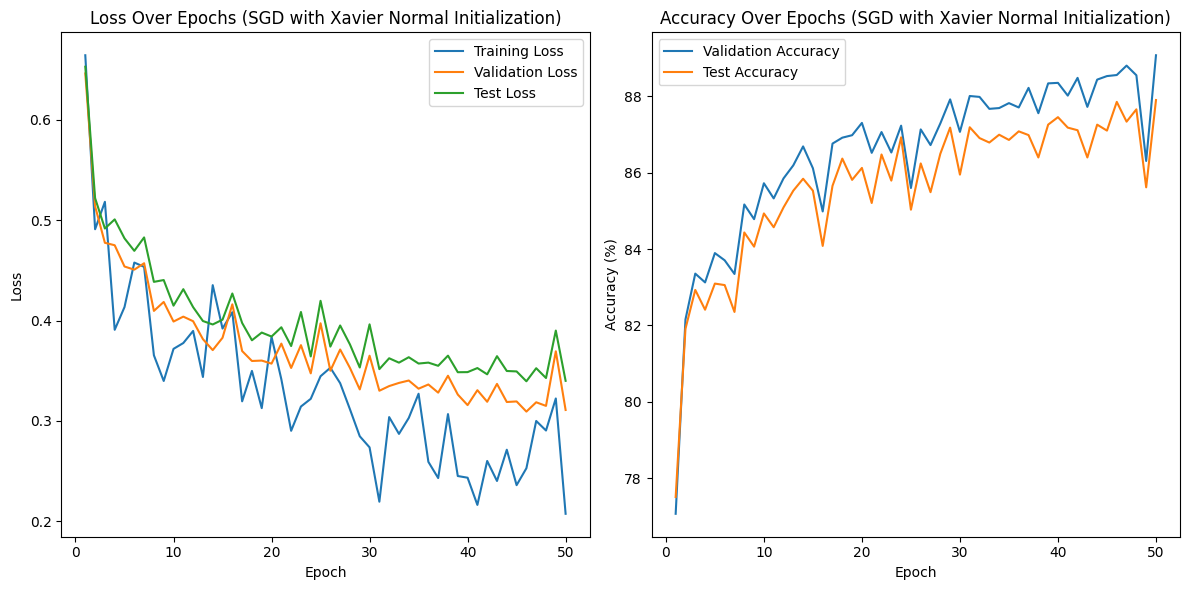

Train Loss Std: 0.0851
Validation Loss Std: 0.0618
Test Loss Std: 0.0584
Validation Accuracy Std: 0.0213
Test Accuracy Std: 0.0191


In [ ]:
#Xavier Normal initilization


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers and Xavier normal initialization
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        nn.init.xavier_normal_(self.fc1.weight)  # Xavier normal initialization
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        nn.init.xavier_normal_(self.fc2.weight)  # Xavier normal initialization
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        nn.init.xavier_normal_(self.fc3.weight)  # Xavier normal initialization

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.02
#learning_rate = 0.01
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD with Xavier Normal Initialization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD with Xavier Normal Initialization)')
plt.legend()
plt.tight_layout()
plt.show()

# ... (previous code)

# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")



Kaiming He Uniform Initlization

  2%|▏         | 1/50 [00:20<16:44, 20.50s/it]

Epoch: 1/50, Train Loss: 0.5626, Validation Loss: 0.5867, Test Loss: 0.5949, Validation Accuracy: 79.13%, Test Accuracy: 78.82%


  4%|▍         | 2/50 [00:42<16:53, 21.12s/it]

Epoch: 2/50, Train Loss: 0.5183, Validation Loss: 0.5082, Test Loss: 0.5240, Validation Accuracy: 81.45%, Test Accuracy: 81.22%


  6%|▌         | 3/50 [01:03<16:40, 21.29s/it]

Epoch: 3/50, Train Loss: 0.4017, Validation Loss: 0.4794, Test Loss: 0.5061, Validation Accuracy: 82.90%, Test Accuracy: 82.03%


  8%|▊         | 4/50 [01:24<16:06, 21.01s/it]

Epoch: 4/50, Train Loss: 0.4891, Validation Loss: 0.5577, Test Loss: 0.5804, Validation Accuracy: 79.61%, Test Accuracy: 78.89%


 10%|█         | 5/50 [01:45<15:55, 21.24s/it]

Epoch: 5/50, Train Loss: 0.3862, Validation Loss: 0.4532, Test Loss: 0.4640, Validation Accuracy: 83.67%, Test Accuracy: 83.45%


 12%|█▏        | 6/50 [02:06<15:30, 21.15s/it]

Epoch: 6/50, Train Loss: 0.3153, Validation Loss: 0.4354, Test Loss: 0.4630, Validation Accuracy: 84.60%, Test Accuracy: 83.68%


 14%|█▍        | 7/50 [02:27<15:09, 21.15s/it]

Epoch: 7/50, Train Loss: 0.4259, Validation Loss: 0.4353, Test Loss: 0.4479, Validation Accuracy: 84.61%, Test Accuracy: 83.84%


 16%|█▌        | 8/50 [02:49<14:53, 21.28s/it]

Epoch: 8/50, Train Loss: 0.3767, Validation Loss: 0.4173, Test Loss: 0.4289, Validation Accuracy: 85.22%, Test Accuracy: 84.58%


 18%|█▊        | 9/50 [03:10<14:23, 21.06s/it]

Epoch: 9/50, Train Loss: 0.3681, Validation Loss: 0.4079, Test Loss: 0.4265, Validation Accuracy: 85.29%, Test Accuracy: 85.04%


 20%|██        | 10/50 [03:31<14:10, 21.26s/it]

Epoch: 10/50, Train Loss: 0.3641, Validation Loss: 0.4090, Test Loss: 0.4232, Validation Accuracy: 85.10%, Test Accuracy: 85.00%


 22%|██▏       | 11/50 [03:53<13:51, 21.31s/it]

Epoch: 11/50, Train Loss: 0.4133, Validation Loss: 0.3943, Test Loss: 0.4042, Validation Accuracy: 85.75%, Test Accuracy: 85.61%


 24%|██▍       | 12/50 [04:13<13:22, 21.11s/it]

Epoch: 12/50, Train Loss: 0.4148, Validation Loss: 0.4263, Test Loss: 0.4364, Validation Accuracy: 84.68%, Test Accuracy: 84.47%


 26%|██▌       | 13/50 [04:36<13:13, 21.46s/it]

Epoch: 13/50, Train Loss: 0.4433, Validation Loss: 0.4389, Test Loss: 0.4611, Validation Accuracy: 83.73%, Test Accuracy: 83.22%


 28%|██▊       | 14/50 [04:57<12:52, 21.47s/it]

Epoch: 14/50, Train Loss: 0.3444, Validation Loss: 0.3715, Test Loss: 0.3863, Validation Accuracy: 86.79%, Test Accuracy: 86.30%


 30%|███       | 15/50 [05:18<12:24, 21.27s/it]

Epoch: 15/50, Train Loss: 0.3098, Validation Loss: 0.3713, Test Loss: 0.3902, Validation Accuracy: 86.86%, Test Accuracy: 86.12%


 32%|███▏      | 16/50 [05:39<12:05, 21.34s/it]

Epoch: 16/50, Train Loss: 0.3260, Validation Loss: 0.3683, Test Loss: 0.3989, Validation Accuracy: 86.78%, Test Accuracy: 85.97%


 34%|███▍      | 17/50 [06:00<11:35, 21.09s/it]

Epoch: 17/50, Train Loss: 0.2575, Validation Loss: 0.3734, Test Loss: 0.3925, Validation Accuracy: 86.65%, Test Accuracy: 85.94%


 36%|███▌      | 18/50 [06:22<11:20, 21.26s/it]

Epoch: 18/50, Train Loss: 0.3162, Validation Loss: 0.3593, Test Loss: 0.3761, Validation Accuracy: 87.03%, Test Accuracy: 86.94%


 38%|███▊      | 19/50 [06:43<11:03, 21.40s/it]

Epoch: 19/50, Train Loss: 0.2549, Validation Loss: 0.3696, Test Loss: 0.3844, Validation Accuracy: 87.17%, Test Accuracy: 85.94%


 40%|████      | 20/50 [07:04<10:37, 21.27s/it]

Epoch: 20/50, Train Loss: 0.3038, Validation Loss: 0.3607, Test Loss: 0.3739, Validation Accuracy: 87.53%, Test Accuracy: 86.72%


 42%|████▏     | 21/50 [07:26<10:22, 21.47s/it]

Epoch: 21/50, Train Loss: 0.3193, Validation Loss: 0.3600, Test Loss: 0.3820, Validation Accuracy: 87.07%, Test Accuracy: 85.88%


 44%|████▍     | 22/50 [07:48<10:01, 21.47s/it]

Epoch: 22/50, Train Loss: 0.3550, Validation Loss: 0.3612, Test Loss: 0.3750, Validation Accuracy: 87.25%, Test Accuracy: 86.77%


 46%|████▌     | 23/50 [08:08<09:31, 21.15s/it]

Epoch: 23/50, Train Loss: 0.3377, Validation Loss: 0.3548, Test Loss: 0.3670, Validation Accuracy: 87.17%, Test Accuracy: 87.21%


 48%|████▊     | 24/50 [08:29<09:12, 21.24s/it]

Epoch: 24/50, Train Loss: 0.2621, Validation Loss: 0.3690, Test Loss: 0.3819, Validation Accuracy: 86.56%, Test Accuracy: 86.60%


 50%|█████     | 25/50 [08:50<08:47, 21.11s/it]

Epoch: 25/50, Train Loss: 0.2919, Validation Loss: 0.3495, Test Loss: 0.3646, Validation Accuracy: 87.69%, Test Accuracy: 86.70%


 52%|█████▏    | 26/50 [09:11<08:25, 21.05s/it]

Epoch: 26/50, Train Loss: 0.2933, Validation Loss: 0.3518, Test Loss: 0.3707, Validation Accuracy: 87.32%, Test Accuracy: 86.60%


 54%|█████▍    | 27/50 [09:33<08:08, 21.24s/it]

Epoch: 27/50, Train Loss: 0.3484, Validation Loss: 0.3470, Test Loss: 0.3587, Validation Accuracy: 87.28%, Test Accuracy: 87.23%


 56%|█████▌    | 28/50 [09:54<07:44, 21.13s/it]

Epoch: 28/50, Train Loss: 0.2822, Validation Loss: 0.3436, Test Loss: 0.3549, Validation Accuracy: 87.78%, Test Accuracy: 87.39%


 58%|█████▊    | 29/50 [10:15<07:26, 21.27s/it]

Epoch: 29/50, Train Loss: 0.3686, Validation Loss: 0.3532, Test Loss: 0.3651, Validation Accuracy: 87.47%, Test Accuracy: 86.76%


 60%|██████    | 30/50 [10:37<07:06, 21.32s/it]

Epoch: 30/50, Train Loss: 0.2231, Validation Loss: 0.3438, Test Loss: 0.3571, Validation Accuracy: 87.61%, Test Accuracy: 87.15%


 62%|██████▏   | 31/50 [10:57<06:40, 21.09s/it]

Epoch: 31/50, Train Loss: 0.2953, Validation Loss: 0.3427, Test Loss: 0.3565, Validation Accuracy: 87.45%, Test Accuracy: 87.50%


 64%|██████▍   | 32/50 [11:19<06:22, 21.24s/it]

Epoch: 32/50, Train Loss: 0.2614, Validation Loss: 0.3449, Test Loss: 0.3581, Validation Accuracy: 87.36%, Test Accuracy: 87.42%


 66%|██████▌   | 33/50 [11:40<05:59, 21.12s/it]

Epoch: 33/50, Train Loss: 0.2538, Validation Loss: 0.3507, Test Loss: 0.3654, Validation Accuracy: 87.25%, Test Accuracy: 86.88%


 68%|██████▊   | 34/50 [12:01<05:37, 21.12s/it]

Epoch: 34/50, Train Loss: 0.3555, Validation Loss: 0.3588, Test Loss: 0.3666, Validation Accuracy: 86.98%, Test Accuracy: 86.89%


 70%|███████   | 35/50 [12:23<05:19, 21.29s/it]

Epoch: 35/50, Train Loss: 0.2803, Validation Loss: 0.3301, Test Loss: 0.3463, Validation Accuracy: 88.19%, Test Accuracy: 87.62%


 72%|███████▏  | 36/50 [12:43<04:54, 21.06s/it]

Epoch: 36/50, Train Loss: 0.2292, Validation Loss: 0.3370, Test Loss: 0.3482, Validation Accuracy: 88.16%, Test Accuracy: 87.44%


 74%|███████▍  | 37/50 [13:05<04:35, 21.21s/it]

Epoch: 37/50, Train Loss: 0.3043, Validation Loss: 0.3354, Test Loss: 0.3568, Validation Accuracy: 87.93%, Test Accuracy: 87.12%


 76%|███████▌  | 38/50 [13:26<04:15, 21.33s/it]

Epoch: 38/50, Train Loss: 0.3445, Validation Loss: 0.3453, Test Loss: 0.3628, Validation Accuracy: 87.22%, Test Accuracy: 87.03%


 78%|███████▊  | 39/50 [13:47<03:51, 21.08s/it]

Epoch: 39/50, Train Loss: 0.3179, Validation Loss: 0.3334, Test Loss: 0.3488, Validation Accuracy: 88.09%, Test Accuracy: 87.53%


 80%|████████  | 40/50 [14:08<03:31, 21.13s/it]

Epoch: 40/50, Train Loss: 0.2360, Validation Loss: 0.3291, Test Loss: 0.3500, Validation Accuracy: 88.13%, Test Accuracy: 87.67%


 82%|████████▏ | 41/50 [14:29<03:10, 21.13s/it]

Epoch: 41/50, Train Loss: 0.2720, Validation Loss: 0.3479, Test Loss: 0.3718, Validation Accuracy: 87.66%, Test Accuracy: 87.00%


 84%|████████▍ | 42/50 [14:50<02:49, 21.17s/it]

Epoch: 42/50, Train Loss: 0.2282, Validation Loss: 0.3337, Test Loss: 0.3519, Validation Accuracy: 87.79%, Test Accuracy: 87.61%


 86%|████████▌ | 43/50 [15:12<02:29, 21.33s/it]

Epoch: 43/50, Train Loss: 0.2606, Validation Loss: 0.3413, Test Loss: 0.3502, Validation Accuracy: 87.81%, Test Accuracy: 87.62%


 88%|████████▊ | 44/50 [15:33<02:07, 21.19s/it]

Epoch: 44/50, Train Loss: 0.2180, Validation Loss: 0.3344, Test Loss: 0.3615, Validation Accuracy: 87.96%, Test Accuracy: 86.88%


 90%|█████████ | 45/50 [15:54<01:46, 21.24s/it]

Epoch: 45/50, Train Loss: 0.1982, Validation Loss: 0.3216, Test Loss: 0.3379, Validation Accuracy: 88.48%, Test Accuracy: 88.01%


 92%|█████████▏| 46/50 [16:16<01:25, 21.31s/it]

Epoch: 46/50, Train Loss: 0.1754, Validation Loss: 0.3221, Test Loss: 0.3376, Validation Accuracy: 88.28%, Test Accuracy: 88.16%


 94%|█████████▍| 47/50 [16:37<01:03, 21.14s/it]

Epoch: 47/50, Train Loss: 0.1849, Validation Loss: 0.3257, Test Loss: 0.3384, Validation Accuracy: 88.14%, Test Accuracy: 87.82%


 96%|█████████▌| 48/50 [16:59<00:42, 21.48s/it]

Epoch: 48/50, Train Loss: 0.2275, Validation Loss: 0.3280, Test Loss: 0.3437, Validation Accuracy: 88.20%, Test Accuracy: 87.75%


 98%|█████████▊| 49/50 [17:21<00:21, 21.60s/it]

Epoch: 49/50, Train Loss: 0.2344, Validation Loss: 0.3257, Test Loss: 0.3406, Validation Accuracy: 87.89%, Test Accuracy: 87.82%


100%|██████████| 50/50 [17:41<00:00, 21.24s/it]

Epoch: 50/50, Train Loss: 0.3207, Validation Loss: 0.3716, Test Loss: 0.3843, Validation Accuracy: 86.35%, Test Accuracy: 85.61%


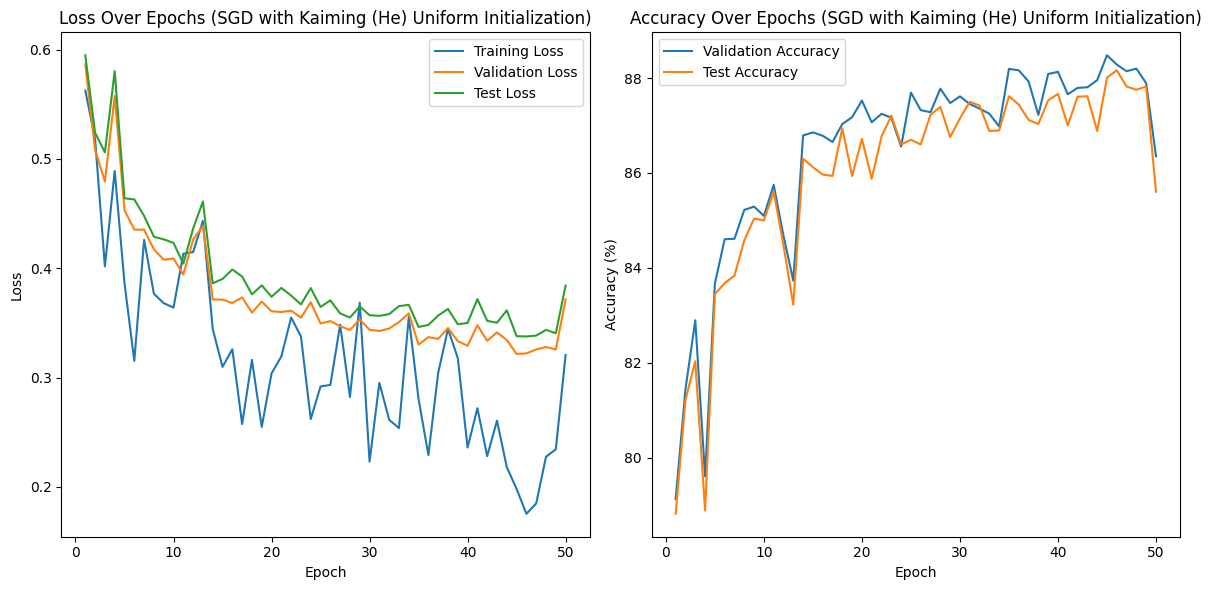

Train Loss Std: 0.0825
Validation Loss Std: 0.0579
Test Loss Std: 0.0584
Validation Accuracy Std: 0.0210
Test Accuracy Std: 0.0212


In [ ]:
# Kaiming He Uniform Initlization


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers and Kaiming (He) Uniform initialization
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        nn.init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')  # Kaiming (He) Uniform initialization
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')  # Kaiming (He) Uniform initialization
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        nn.init.kaiming_uniform_(self.fc3.weight, mode='fan_in', nonlinearity='relu')  # Kaiming (He) Uniform initialization

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.02
#learning_rate = 0.01
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD with Kaiming (He) Uniform Initialization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD with Kaiming (He) Uniform Initialization)')
plt.legend()
plt.tight_layout()
plt.show()

# ... (previous code)

# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")


Batch Normalization

  2%|▏         | 1/50 [00:17<14:36, 17.88s/it]

Epoch: 1/50, Train Loss: 0.8087, Validation Loss: 0.8010, Test Loss: 0.8149, Validation Accuracy: 76.91%, Test Accuracy: 76.93%


  4%|▍         | 2/50 [00:35<14:20, 17.92s/it]

Epoch: 2/50, Train Loss: 0.6151, Validation Loss: 0.6203, Test Loss: 0.6415, Validation Accuracy: 81.30%, Test Accuracy: 80.00%


  6%|▌         | 3/50 [00:54<14:13, 18.16s/it]

Epoch: 3/50, Train Loss: 0.5478, Validation Loss: 0.5422, Test Loss: 0.5688, Validation Accuracy: 82.87%, Test Accuracy: 81.75%


  8%|▊         | 4/50 [01:12<13:47, 17.99s/it]

Epoch: 4/50, Train Loss: 0.5866, Validation Loss: 0.4922, Test Loss: 0.5133, Validation Accuracy: 84.27%, Test Accuracy: 82.98%


 10%|█         | 5/50 [01:32<14:06, 18.82s/it]

Epoch: 5/50, Train Loss: 0.4566, Validation Loss: 0.4611, Test Loss: 0.4848, Validation Accuracy: 85.01%, Test Accuracy: 83.78%


 12%|█▏        | 6/50 [01:50<13:31, 18.44s/it]

Epoch: 6/50, Train Loss: 0.4743, Validation Loss: 0.4400, Test Loss: 0.4628, Validation Accuracy: 85.15%, Test Accuracy: 84.38%


 14%|█▍        | 7/50 [02:08<13:14, 18.47s/it]

Epoch: 7/50, Train Loss: 0.3762, Validation Loss: 0.4234, Test Loss: 0.4505, Validation Accuracy: 85.72%, Test Accuracy: 84.57%


 16%|█▌        | 8/50 [02:26<12:45, 18.23s/it]

Epoch: 8/50, Train Loss: 0.3687, Validation Loss: 0.4090, Test Loss: 0.4398, Validation Accuracy: 86.26%, Test Accuracy: 84.87%


 18%|█▊        | 9/50 [02:44<12:30, 18.31s/it]

Epoch: 9/50, Train Loss: 0.4364, Validation Loss: 0.3998, Test Loss: 0.4240, Validation Accuracy: 86.58%, Test Accuracy: 85.07%


 20%|██        | 10/50 [03:03<12:12, 18.30s/it]

Epoch: 10/50, Train Loss: 0.3923, Validation Loss: 0.3884, Test Loss: 0.4180, Validation Accuracy: 86.88%, Test Accuracy: 85.34%


 22%|██▏       | 11/50 [03:20<11:48, 18.17s/it]

Epoch: 11/50, Train Loss: 0.3904, Validation Loss: 0.3803, Test Loss: 0.4076, Validation Accuracy: 87.12%, Test Accuracy: 85.79%


 24%|██▍       | 12/50 [03:39<11:36, 18.33s/it]

Epoch: 12/50, Train Loss: 0.4238, Validation Loss: 0.3760, Test Loss: 0.4051, Validation Accuracy: 86.95%, Test Accuracy: 85.69%


 26%|██▌       | 13/50 [03:57<11:11, 18.15s/it]

Epoch: 13/50, Train Loss: 0.3939, Validation Loss: 0.3694, Test Loss: 0.3934, Validation Accuracy: 87.11%, Test Accuracy: 85.91%


 28%|██▊       | 14/50 [04:16<10:59, 18.33s/it]

Epoch: 14/50, Train Loss: 0.3203, Validation Loss: 0.3695, Test Loss: 0.3998, Validation Accuracy: 87.27%, Test Accuracy: 85.38%


 30%|███       | 15/50 [04:34<10:46, 18.48s/it]

Epoch: 15/50, Train Loss: 0.2309, Validation Loss: 0.3572, Test Loss: 0.3884, Validation Accuracy: 87.53%, Test Accuracy: 86.52%


 32%|███▏      | 16/50 [04:53<10:30, 18.54s/it]

Epoch: 16/50, Train Loss: 0.4152, Validation Loss: 0.3560, Test Loss: 0.3905, Validation Accuracy: 88.00%, Test Accuracy: 86.37%


 34%|███▍      | 17/50 [05:11<10:04, 18.33s/it]

Epoch: 17/50, Train Loss: 0.2877, Validation Loss: 0.3475, Test Loss: 0.3729, Validation Accuracy: 88.01%, Test Accuracy: 86.83%


 36%|███▌      | 18/50 [05:29<09:42, 18.20s/it]

Epoch: 18/50, Train Loss: 0.4581, Validation Loss: 0.3467, Test Loss: 0.3845, Validation Accuracy: 88.06%, Test Accuracy: 86.37%


 38%|███▊      | 19/50 [05:48<09:29, 18.38s/it]

Epoch: 19/50, Train Loss: 0.3154, Validation Loss: 0.3470, Test Loss: 0.3682, Validation Accuracy: 87.71%, Test Accuracy: 87.20%


 40%|████      | 20/50 [06:05<09:04, 18.16s/it]

Epoch: 20/50, Train Loss: 0.3755, Validation Loss: 0.3434, Test Loss: 0.3684, Validation Accuracy: 87.84%, Test Accuracy: 86.74%


 42%|████▏     | 21/50 [06:24<08:52, 18.37s/it]

Epoch: 21/50, Train Loss: 0.2654, Validation Loss: 0.3370, Test Loss: 0.3649, Validation Accuracy: 88.22%, Test Accuracy: 87.09%


 44%|████▍     | 22/50 [06:42<08:29, 18.21s/it]

Epoch: 22/50, Train Loss: 0.2314, Validation Loss: 0.3315, Test Loss: 0.3602, Validation Accuracy: 88.43%, Test Accuracy: 87.35%


 46%|████▌     | 23/50 [07:01<08:15, 18.36s/it]

Epoch: 23/50, Train Loss: 0.2270, Validation Loss: 0.3315, Test Loss: 0.3583, Validation Accuracy: 88.61%, Test Accuracy: 87.42%


 48%|████▊     | 24/50 [07:19<07:55, 18.29s/it]

Epoch: 24/50, Train Loss: 0.2656, Validation Loss: 0.3338, Test Loss: 0.3592, Validation Accuracy: 87.89%, Test Accuracy: 87.28%


 50%|█████     | 25/50 [07:37<07:33, 18.13s/it]

Epoch: 25/50, Train Loss: 0.2341, Validation Loss: 0.3275, Test Loss: 0.3547, Validation Accuracy: 88.16%, Test Accuracy: 87.66%


 52%|█████▏    | 26/50 [07:55<07:20, 18.34s/it]

Epoch: 26/50, Train Loss: 0.2900, Validation Loss: 0.3259, Test Loss: 0.3531, Validation Accuracy: 88.27%, Test Accuracy: 87.31%


 54%|█████▍    | 27/50 [08:13<06:57, 18.17s/it]

Epoch: 27/50, Train Loss: 0.2922, Validation Loss: 0.3222, Test Loss: 0.3459, Validation Accuracy: 88.58%, Test Accuracy: 87.81%


 56%|█████▌    | 28/50 [08:35<07:05, 19.36s/it]

Epoch: 28/50, Train Loss: 0.2995, Validation Loss: 0.3190, Test Loss: 0.3575, Validation Accuracy: 88.60%, Test Accuracy: 87.52%


 58%|█████▊    | 29/50 [08:53<06:37, 18.94s/it]

Epoch: 29/50, Train Loss: 0.2337, Validation Loss: 0.3230, Test Loss: 0.3474, Validation Accuracy: 88.24%, Test Accuracy: 87.57%


 60%|██████    | 30/50 [09:12<06:18, 18.92s/it]

Epoch: 30/50, Train Loss: 0.3402, Validation Loss: 0.3699, Test Loss: 0.3968, Validation Accuracy: 86.72%, Test Accuracy: 85.42%


 62%|██████▏   | 31/50 [09:30<05:55, 18.70s/it]

Epoch: 31/50, Train Loss: 0.2511, Validation Loss: 0.3256, Test Loss: 0.3562, Validation Accuracy: 88.36%, Test Accuracy: 87.25%


 64%|██████▍   | 32/50 [09:49<05:37, 18.75s/it]

Epoch: 32/50, Train Loss: 0.2801, Validation Loss: 0.3123, Test Loss: 0.3469, Validation Accuracy: 88.84%, Test Accuracy: 87.61%


 66%|██████▌   | 33/50 [10:07<05:14, 18.49s/it]

Epoch: 33/50, Train Loss: 0.2823, Validation Loss: 0.3138, Test Loss: 0.3465, Validation Accuracy: 88.83%, Test Accuracy: 87.53%


 68%|██████▊   | 34/50 [10:25<04:53, 18.37s/it]

Epoch: 34/50, Train Loss: 0.2864, Validation Loss: 0.3113, Test Loss: 0.3405, Validation Accuracy: 88.92%, Test Accuracy: 87.93%


 70%|███████   | 35/50 [10:44<04:37, 18.49s/it]

Epoch: 35/50, Train Loss: 0.2954, Validation Loss: 0.3145, Test Loss: 0.3395, Validation Accuracy: 88.69%, Test Accuracy: 87.82%


 72%|███████▏  | 36/50 [11:02<04:16, 18.30s/it]

Epoch: 36/50, Train Loss: 0.2453, Validation Loss: 0.3119, Test Loss: 0.3384, Validation Accuracy: 88.85%, Test Accuracy: 87.95%


 74%|███████▍  | 37/50 [11:21<04:00, 18.49s/it]

Epoch: 37/50, Train Loss: 0.2808, Validation Loss: 0.3065, Test Loss: 0.3393, Validation Accuracy: 89.00%, Test Accuracy: 87.83%


 76%|███████▌  | 38/50 [11:39<03:40, 18.35s/it]

Epoch: 38/50, Train Loss: 0.2652, Validation Loss: 0.3159, Test Loss: 0.3442, Validation Accuracy: 88.56%, Test Accuracy: 87.57%


 78%|███████▊  | 39/50 [11:57<03:22, 18.45s/it]

Epoch: 39/50, Train Loss: 0.2097, Validation Loss: 0.3073, Test Loss: 0.3366, Validation Accuracy: 89.24%, Test Accuracy: 87.89%


 80%|████████  | 40/50 [12:15<03:02, 18.29s/it]

Epoch: 40/50, Train Loss: 0.2696, Validation Loss: 0.3245, Test Loss: 0.3581, Validation Accuracy: 88.33%, Test Accuracy: 87.28%


 82%|████████▏ | 41/50 [12:35<02:47, 18.65s/it]

Epoch: 41/50, Train Loss: 0.2392, Validation Loss: 0.3184, Test Loss: 0.3475, Validation Accuracy: 88.67%, Test Accuracy: 87.14%


 84%|████████▍ | 42/50 [12:53<02:29, 18.63s/it]

Epoch: 42/50, Train Loss: 0.2803, Validation Loss: 0.3345, Test Loss: 0.3720, Validation Accuracy: 87.89%, Test Accuracy: 86.51%


 86%|████████▌ | 43/50 [13:11<02:09, 18.44s/it]

Epoch: 43/50, Train Loss: 0.2286, Validation Loss: 0.3077, Test Loss: 0.3417, Validation Accuracy: 89.03%, Test Accuracy: 87.68%


 88%|████████▊ | 44/50 [13:30<01:51, 18.59s/it]

Epoch: 44/50, Train Loss: 0.2021, Validation Loss: 0.3090, Test Loss: 0.3420, Validation Accuracy: 88.79%, Test Accuracy: 87.78%


 90%|█████████ | 45/50 [13:49<01:32, 18.53s/it]

Epoch: 45/50, Train Loss: 0.2212, Validation Loss: 0.3214, Test Loss: 0.3603, Validation Accuracy: 88.55%, Test Accuracy: 87.09%


 92%|█████████▏| 46/50 [14:08<01:14, 18.67s/it]

Epoch: 46/50, Train Loss: 0.2712, Validation Loss: 0.3049, Test Loss: 0.3399, Validation Accuracy: 89.17%, Test Accuracy: 88.00%


 94%|█████████▍| 47/50 [14:26<00:55, 18.45s/it]

Epoch: 47/50, Train Loss: 0.2316, Validation Loss: 0.2998, Test Loss: 0.3300, Validation Accuracy: 89.23%, Test Accuracy: 88.29%


 96%|█████████▌| 48/50 [14:44<00:36, 18.43s/it]

Epoch: 48/50, Train Loss: 0.2292, Validation Loss: 0.3379, Test Loss: 0.3771, Validation Accuracy: 87.96%, Test Accuracy: 86.89%


 98%|█████████▊| 49/50 [15:02<00:18, 18.39s/it]

Epoch: 49/50, Train Loss: 0.2099, Validation Loss: 0.2967, Test Loss: 0.3349, Validation Accuracy: 89.38%, Test Accuracy: 88.18%


100%|██████████| 50/50 [15:20<00:00, 18.42s/it]

Epoch: 50/50, Train Loss: 0.2316, Validation Loss: 0.3128, Test Loss: 0.3402, Validation Accuracy: 88.95%, Test Accuracy: 87.74%


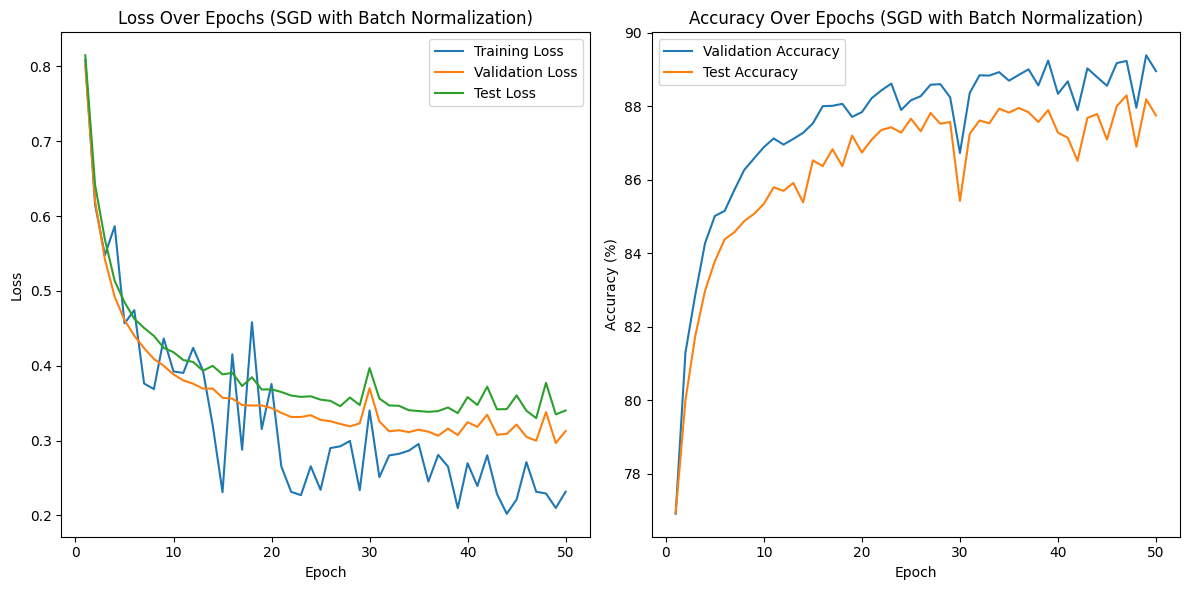

Train Loss Std: 0.1206
Validation Loss Std: 0.0886
Test Loss Std: 0.0856
Validation Accuracy Std: 0.0221
Test Accuracy Std: 0.0215


In [4]:
#Batch Normalization

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming you have defined train_batches, val_batches, and test_batches

# Define the neural network model with two hidden layers and batch normalization
class ACAIGFCN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2):
        super(ACAIGFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize neural network model with input, output, and hidden layer dimensions
hidden_dim1 = 300
hidden_dim2 = 200
model = ACAIGFCN(input_dim=784, output_dim=10, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

# Define the learning rate and epochs number
learning_rate = 0.008
#learning_rate = 0.01
epochs = 50

# Calculate the number of batches
num_train_batches = len(train_batches)
num_val_batches = len(val_batches)
num_test_batches = len(test_batches)

train_loss_list = np.zeros((epochs,))
validation_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
test_loss_list = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Iterate over epochs, batches with a progress bar and train+validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm(range(epochs)):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = loss_func(outputs, train_labels)
        loss.backward()
        optimizer.step()

    # Record training loss for the epoch
    train_loss_list[epoch] = loss.item()

    # ACAIGFCN Validation
    val_acc = 0.0
    val_loss = 0.0
    for val_features, val_labels in val_batches:
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (predictions)
            val_outputs = model(val_features)

            # Compute validation accuracy
            val_acc += (torch.argmax(val_outputs, dim=1) == val_labels).float().mean().item()

            # Compute validation loss
            val_loss += loss_func(val_outputs, val_labels).item()

    # Record validation accuracy and loss for the epoch
    val_acc /= num_val_batches
    val_loss /= num_val_batches
    validation_accuracy_list[epoch] = val_acc
    validation_loss_list[epoch] = val_loss

    # ACAIGFCN Testing
    test_acc = 0.0
    test_loss = 0.0
    for test_features, test_labels in test_batches:
        # Telling PyTorch we aren't passing inputs to the network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute test outputs (predictions)
            test_outputs = model(test_features)

            # Compute test accuracy
            test_acc += (torch.argmax(test_outputs, dim=1) == test_labels).float().mean().item()

            # Compute test loss
            test_loss += loss_func(test_outputs, test_labels).item()

    # Record testing accuracy and loss for the epoch
    test_acc /= num_test_batches
    test_loss /= num_test_batches
    test_accuracy_list[epoch] = test_acc
    test_loss_list[epoch] = test_loss

    # Print training loss, validation loss, validation accuracy, and testing accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")

# Plot training, validation, and testing loss on a single graph
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss_list, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (SGD with Batch Normalization)')
plt.legend()

# Plot Validation and Test Accuracy on another graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), validation_accuracy_list * 100, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list * 100, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs (SGD with Batch Normalization)')
plt.legend()
plt.tight_layout()
plt.show()

# ... (previous code)

# Calculate standard deviations
train_loss_std = np.std(train_loss_list)
validation_loss_std = np.std(validation_loss_list)
test_loss_std = np.std(test_loss_list)

validation_accuracy_std = np.std(validation_accuracy_list)
test_accuracy_std = np.std(test_accuracy_list)

# Print standard deviations
print(f"Train Loss Std: {train_loss_std:.4f}")
print(f"Validation Loss Std: {validation_loss_std:.4f}")
print(f"Test Loss Std: {test_loss_std:.4f}")

print(f"Validation Accuracy Std: {validation_accuracy_std:.4f}")
print(f"Test Accuracy Std: {test_accuracy_std:.4f}")



AlexNet CNN Architecture

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 21650779.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 635772.77it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5589186.26it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2250505.47it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Loss: 2.2679, Test Accuracy: 33.61%
Epoch [2/10], Loss: 2.1831, Test Accuracy: 48.92%
Epoch [3/10], Loss: 1.7837, Test Accuracy: 61.32%
Epoch [4/10], Loss: 0.8816, Test Accuracy: 80.22%
Epoch [5/10], Loss: 0.3688, Test Accuracy: 85.48%
Epoch [6/10], Loss: 0.6878, Test Accuracy: 88.60%
Epoch [7/10], Loss: 0.3493, Test Accuracy: 90.27%
Epoch [8/10], Loss: 0.1159, Test Accuracy: 91.19%
Epoch [9/10], Loss: 0.1814, Test Accuracy: 92.04%
Epoch [10/10], Loss: 0.3461, Test Accuracy: 93.14%


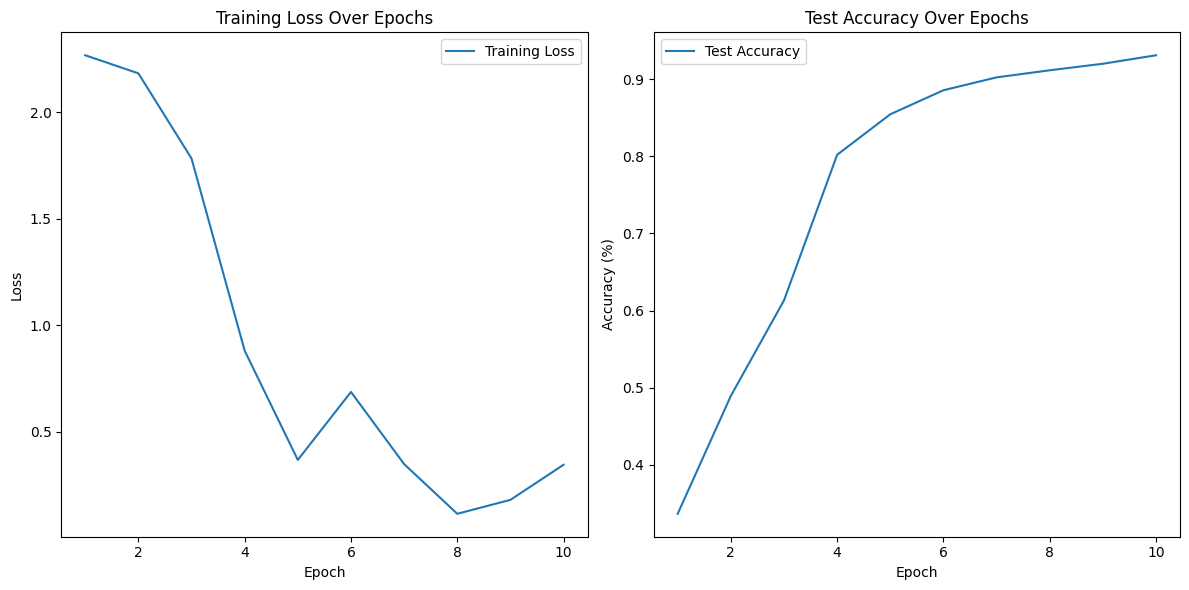

Training and testing complete!


In [5]:
#AlexNet CNN
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc3 = nn.Linear(64 * 7 * 7, 256)
        self.fc4 = nn.Linear(256, 128)
        self.softmax = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.softmax(x)
        return x

# Load MNIST dataset and create data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the CNN model
model = SimpleCNN()

# Define the learning rate and epochs number
learning_rate = 0.001
epochs = 10

# Define loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Lists to store loss and accuracy values
train_loss_list = []
test_accuracy_list = []

# Training and Testing Loop
for epoch in range(epochs):
    # Training
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

    # Testing
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss_func(outputs, labels).item()

    accuracy = correct / total
    test_loss /= len(test_loader.dataset)

    # Append values to the lists
    train_loss_list.append(loss.item())
    test_accuracy_list.append(accuracy)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

# Plot loss and testing curves
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

print('Training and testing complete!')